# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/vbd8bavn/checkpoints/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpgf3okjgu


[d3graph] INFO> Writing /local/scratch/tmp/tmpgf3okjgu/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    #'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    #'mesangial cell',
    #'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    #'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']


  0%|          | 0/27 [00:00<?, ?it/s]


  4%|▎         | 1/27 [00:02<00:54,  2.08s/it]


  7%|▋         | 2/27 [00:02<00:26,  1.07s/it]


 11%|█         | 3/27 [00:02<00:16,  1.42it/s]


 15%|█▍        | 4/27 [00:02<00:12,  1.87it/s]


 19%|█▊        | 5/27 [00:03<00:09,  2.28it/s]


 22%|██▏       | 6/27 [00:03<00:07,  2.64it/s]


 26%|██▌       | 7/27 [00:03<00:06,  2.92it/s]


 30%|██▉       | 8/27 [00:04<00:06,  3.13it/s]


 33%|███▎      | 9/27 [00:04<00:05,  3.30it/s]


 37%|███▋      | 10/27 [00:04<00:04,  3.44it/s]


 41%|████      | 11/27 [00:04<00:04,  3.53it/s]


 44%|████▍     | 12/27 [00:05<00:04,  3.59it/s]


 48%|████▊     | 13/27 [00:05<00:03,  3.64it/s]


 52%|█████▏    | 14/27 [00:05<00:03,  3.69it/s]


 56%|█████▌    | 15/27 [00:05<00:03,  3.70it/s]


 59%|█████▉    | 16/27 [00:06<00:02,  3.73it/s]


 63%|██████▎   | 17/27 [00:06<00:02,  3.74it/s]


 67%|██████▋   | 18/27 [00:06<00:02,  3.73it/s]


 70%|███████   | 19/27 [00:06<00:02,  3.75it/s]


 74%|███████▍  | 20/27 [00:07<00:01,  3.76it/s]


 78%|███████▊  | 21/27 [00:07<00:01,  3.55it/s]


 81%|████████▏ | 22/27 [00:07<00:01,  3.55it/s]


 85%|████████▌ | 23/27 [00:08<00:01,  3.63it/s]


 89%|████████▉ | 24/27 [00:08<00:00,  3.65it/s]


 93%|█████████▎| 25/27 [00:08<00:00,  3.68it/s]


 96%|█████████▋| 26/27 [00:08<00:00,  3.78it/s]


100%|██████████| 27/27 [00:09<00:00,  4.10it/s]


100%|██████████| 27/27 [00:09<00:00,  2.92it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


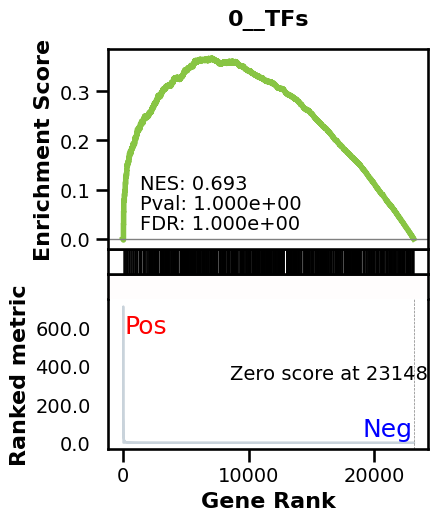

_________________________________________
TF specific enrichment


found some significant results for  70.53571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:33,  3.79it/s]


  2%|▏         | 2/128 [00:00<00:33,  3.78it/s]


  2%|▏         | 3/128 [00:00<00:33,  3.78it/s]


  3%|▎         | 4/128 [00:01<00:32,  3.78it/s]


  4%|▍         | 5/128 [00:01<00:32,  3.78it/s]


  5%|▍         | 6/128 [00:01<00:32,  3.78it/s]


  5%|▌         | 7/128 [00:01<00:32,  3.78it/s]


  6%|▋         | 8/128 [00:02<00:31,  3.78it/s]


  7%|▋         | 9/128 [00:02<00:31,  3.77it/s]


  8%|▊         | 10/128 [00:02<00:31,  3.77it/s]


  9%|▊         | 11/128 [00:02<00:30,  3.77it/s]


  9%|▉         | 12/128 [00:03<00:30,  3.78it/s]


 10%|█         | 13/128 [00:03<00:30,  3.77it/s]


 11%|█         | 14/128 [00:03<00:30,  3.77it/s]


 12%|█▏        | 15/128 [00:03<00:29,  3.78it/s]


 12%|█▎        | 16/128 [00:04<00:29,  3.78it/s]


 13%|█▎        | 17/128 [00:04<00:29,  3.77it/s]


 14%|█▍        | 18/128 [00:04<00:29,  3.77it/s]


 15%|█▍        | 19/128 [00:05<00:28,  3.77it/s]


 16%|█▌        | 20/128 [00:05<00:28,  3.77it/s]


 16%|█▋        | 21/128 [00:05<00:28,  3.77it/s]


 17%|█▋        | 22/128 [00:05<00:28,  3.78it/s]


 18%|█▊        | 23/128 [00:06<00:27,  3.78it/s]


 19%|█▉        | 24/128 [00:06<00:27,  3.77it/s]


 20%|█▉        | 25/128 [00:06<00:27,  3.77it/s]


 20%|██        | 26/128 [00:06<00:27,  3.77it/s]


 21%|██        | 27/128 [00:07<00:26,  3.78it/s]


 22%|██▏       | 28/128 [00:07<00:26,  3.73it/s]


 23%|██▎       | 29/128 [00:07<00:27,  3.63it/s]


 23%|██▎       | 30/128 [00:07<00:26,  3.67it/s]


 24%|██▍       | 31/128 [00:08<00:26,  3.70it/s]


 25%|██▌       | 32/128 [00:08<00:25,  3.72it/s]


 26%|██▌       | 33/128 [00:08<00:25,  3.74it/s]


 27%|██▋       | 34/128 [00:09<00:25,  3.75it/s]


 27%|██▋       | 35/128 [00:09<00:24,  3.75it/s]


 28%|██▊       | 36/128 [00:09<00:24,  3.76it/s]


 29%|██▉       | 37/128 [00:09<00:24,  3.76it/s]


 30%|██▉       | 38/128 [00:10<00:24,  3.60it/s]


 30%|███       | 39/128 [00:10<00:24,  3.62it/s]


 31%|███▏      | 40/128 [00:10<00:24,  3.66it/s]


 32%|███▏      | 41/128 [00:10<00:23,  3.70it/s]


 33%|███▎      | 42/128 [00:11<00:23,  3.72it/s]


 34%|███▎      | 43/128 [00:11<00:22,  3.73it/s]


 34%|███▍      | 44/128 [00:11<00:22,  3.74it/s]


 35%|███▌      | 45/128 [00:12<00:22,  3.75it/s]


 36%|███▌      | 46/128 [00:12<00:21,  3.76it/s]


 37%|███▋      | 47/128 [00:12<00:21,  3.75it/s]


 38%|███▊      | 48/128 [00:12<00:21,  3.67it/s]


 38%|███▊      | 49/128 [00:13<00:21,  3.70it/s]


 39%|███▉      | 50/128 [00:13<00:20,  3.72it/s]


 40%|███▉      | 51/128 [00:13<00:20,  3.72it/s]


 41%|████      | 52/128 [00:13<00:20,  3.69it/s]


 41%|████▏     | 53/128 [00:14<00:20,  3.69it/s]


 42%|████▏     | 54/128 [00:14<00:20,  3.68it/s]


 43%|████▎     | 55/128 [00:14<00:19,  3.69it/s]


 44%|████▍     | 56/128 [00:14<00:19,  3.72it/s]


 45%|████▍     | 57/128 [00:15<00:19,  3.74it/s]


 45%|████▌     | 58/128 [00:15<00:18,  3.74it/s]


 46%|████▌     | 59/128 [00:15<00:18,  3.75it/s]


 47%|████▋     | 60/128 [00:16<00:18,  3.75it/s]


 48%|████▊     | 61/128 [00:16<00:17,  3.76it/s]


 48%|████▊     | 62/128 [00:16<00:17,  3.77it/s]


 49%|████▉     | 63/128 [00:16<00:17,  3.77it/s]


 50%|█████     | 64/128 [00:17<00:16,  3.77it/s]


 51%|█████     | 65/128 [00:17<00:16,  3.77it/s]


 52%|█████▏    | 66/128 [00:17<00:16,  3.76it/s]


 52%|█████▏    | 67/128 [00:17<00:16,  3.76it/s]


 53%|█████▎    | 68/128 [00:18<00:15,  3.77it/s]


 54%|█████▍    | 69/128 [00:18<00:15,  3.77it/s]


 55%|█████▍    | 70/128 [00:18<00:15,  3.77it/s]


 55%|█████▌    | 71/128 [00:18<00:15,  3.77it/s]


 56%|█████▋    | 72/128 [00:19<00:14,  3.77it/s]


 57%|█████▋    | 73/128 [00:19<00:14,  3.77it/s]


 58%|█████▊    | 74/128 [00:19<00:14,  3.77it/s]


 59%|█████▊    | 75/128 [00:20<00:14,  3.78it/s]


 59%|█████▉    | 76/128 [00:20<00:13,  3.78it/s]


 60%|██████    | 77/128 [00:20<00:14,  3.56it/s]


 61%|██████    | 78/128 [00:20<00:13,  3.62it/s]


 62%|██████▏   | 79/128 [00:21<00:13,  3.67it/s]


 62%|██████▎   | 80/128 [00:21<00:12,  3.70it/s]


 63%|██████▎   | 81/128 [00:21<00:12,  3.72it/s]


 64%|██████▍   | 82/128 [00:21<00:12,  3.74it/s]


 65%|██████▍   | 83/128 [00:22<00:11,  3.76it/s]


 66%|██████▌   | 84/128 [00:22<00:11,  3.76it/s]


 66%|██████▋   | 85/128 [00:22<00:11,  3.76it/s]


 67%|██████▋   | 86/128 [00:22<00:11,  3.77it/s]


 68%|██████▊   | 87/128 [00:23<00:10,  3.78it/s]


 69%|██████▉   | 88/128 [00:23<00:10,  3.78it/s]


 70%|██████▉   | 89/128 [00:23<00:10,  3.78it/s]


 70%|███████   | 90/128 [00:24<00:10,  3.78it/s]


 71%|███████   | 91/128 [00:24<00:09,  3.79it/s]


 72%|███████▏  | 92/128 [00:24<00:09,  3.78it/s]


 73%|███████▎  | 93/128 [00:24<00:09,  3.78it/s]


 73%|███████▎  | 94/128 [00:25<00:08,  3.79it/s]


 74%|███████▍  | 95/128 [00:25<00:08,  3.78it/s]


 75%|███████▌  | 96/128 [00:25<00:08,  3.78it/s]


 76%|███████▌  | 97/128 [00:25<00:08,  3.78it/s]


 77%|███████▋  | 98/128 [00:26<00:07,  3.79it/s]


 77%|███████▋  | 99/128 [00:26<00:07,  3.79it/s]


 78%|███████▊  | 100/128 [00:26<00:07,  3.79it/s]


 79%|███████▉  | 101/128 [00:26<00:07,  3.79it/s]


 80%|███████▉  | 102/128 [00:27<00:06,  3.79it/s]


 80%|████████  | 103/128 [00:27<00:06,  3.79it/s]


 81%|████████▏ | 104/128 [00:27<00:06,  3.78it/s]


 82%|████████▏ | 105/128 [00:28<00:06,  3.76it/s]


 83%|████████▎ | 106/128 [00:28<00:05,  3.71it/s]


 84%|████████▎ | 107/128 [00:28<00:05,  3.68it/s]


 84%|████████▍ | 108/128 [00:28<00:05,  3.67it/s]


 85%|████████▌ | 109/128 [00:29<00:05,  3.66it/s]


 86%|████████▌ | 110/128 [00:29<00:04,  3.67it/s]


 87%|████████▋ | 111/128 [00:29<00:04,  3.67it/s]


 88%|████████▊ | 112/128 [00:29<00:04,  3.70it/s]


 88%|████████▊ | 113/128 [00:30<00:04,  3.72it/s]


 89%|████████▉ | 114/128 [00:30<00:03,  3.74it/s]


 90%|████████▉ | 115/128 [00:30<00:03,  3.76it/s]


 91%|█████████ | 116/128 [00:30<00:03,  3.77it/s]


 91%|█████████▏| 117/128 [00:31<00:02,  3.78it/s]


 92%|█████████▏| 118/128 [00:31<00:02,  3.79it/s]


 93%|█████████▎| 119/128 [00:31<00:02,  3.79it/s]


 94%|█████████▍| 120/128 [00:32<00:02,  3.80it/s]


 95%|█████████▍| 121/128 [00:32<00:01,  3.80it/s]


 95%|█████████▌| 122/128 [00:32<00:01,  3.80it/s]


 96%|█████████▌| 123/128 [00:32<00:01,  3.80it/s]


 97%|█████████▋| 124/128 [00:33<00:01,  3.80it/s]


 98%|█████████▊| 125/128 [00:33<00:00,  3.80it/s]


 98%|█████████▊| 126/128 [00:33<00:00,  3.80it/s]


 99%|█████████▉| 127/128 [00:33<00:00,  3.80it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:34<00:00,  3.79it/s]


100%|██████████| 128/128 [00:34<00:00,  3.75it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009514055469821365


EPR: 1.9825351225278036


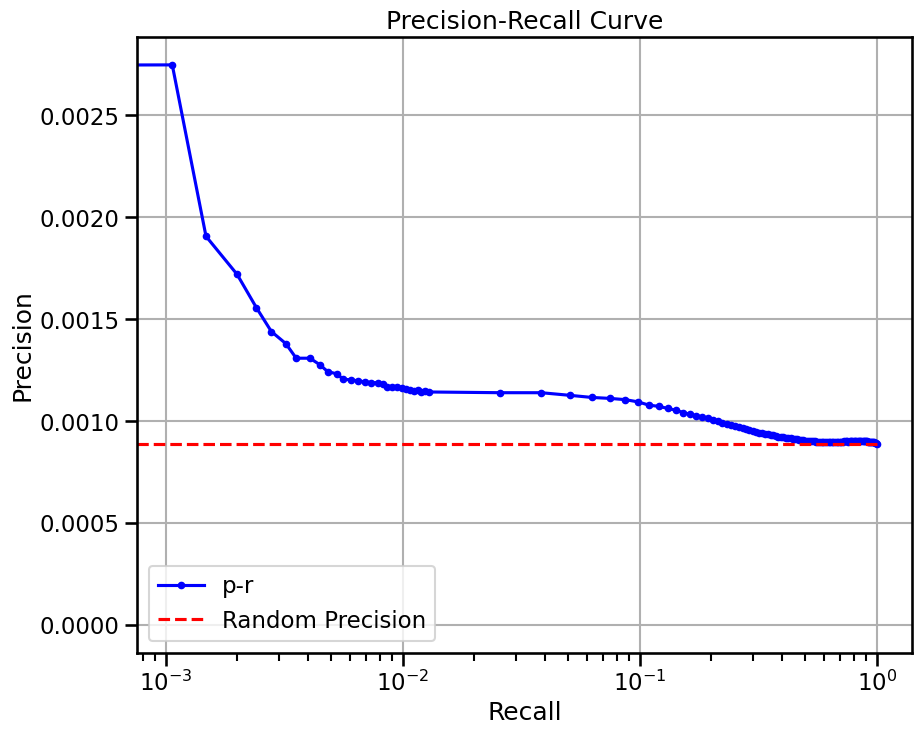


  0%|          | 0/54 [00:00<?, ?it/s]


  2%|▏         | 1/54 [00:01<01:09,  1.31s/it]


  4%|▎         | 2/54 [00:01<00:35,  1.45it/s]


  6%|▌         | 3/54 [00:06<02:13,  2.63s/it]


  7%|▋         | 4/54 [00:06<01:24,  1.69s/it]


  9%|▉         | 5/54 [00:07<00:57,  1.18s/it]


 11%|█         | 6/54 [00:07<00:47,  1.02it/s]


 13%|█▎        | 7/54 [00:07<00:35,  1.31it/s]


 15%|█▍        | 8/54 [00:08<00:28,  1.63it/s]


 17%|█▋        | 9/54 [00:08<00:23,  1.93it/s]


 19%|█▊        | 10/54 [00:08<00:19,  2.22it/s]


 20%|██        | 11/54 [00:09<00:17,  2.47it/s]


 22%|██▏       | 12/54 [00:09<00:15,  2.68it/s]


 24%|██▍       | 13/54 [00:09<00:14,  2.84it/s]


 26%|██▌       | 14/54 [00:10<00:13,  2.97it/s]


 28%|██▊       | 15/54 [00:10<00:12,  3.06it/s]


 30%|██▉       | 16/54 [00:10<00:12,  3.11it/s]


 31%|███▏      | 17/54 [00:10<00:11,  3.33it/s]


 33%|███▎      | 18/54 [00:11<00:10,  3.51it/s]


 35%|███▌      | 19/54 [00:11<00:09,  3.62it/s]


 37%|███▋      | 20/54 [00:11<00:09,  3.72it/s]


 39%|███▉      | 21/54 [00:11<00:08,  3.80it/s]


 41%|████      | 22/54 [00:12<00:08,  3.86it/s]


 43%|████▎     | 23/54 [00:12<00:07,  3.90it/s]


 44%|████▍     | 24/54 [00:12<00:07,  3.93it/s]


 46%|████▋     | 25/54 [00:12<00:07,  3.95it/s]


 48%|████▊     | 26/54 [00:13<00:07,  3.95it/s]


 50%|█████     | 27/54 [00:13<00:06,  3.95it/s]


 52%|█████▏    | 28/54 [00:13<00:07,  3.43it/s]


 54%|█████▎    | 29/54 [00:14<00:07,  3.56it/s]


 56%|█████▌    | 30/54 [00:14<00:06,  3.66it/s]


 57%|█████▋    | 31/54 [00:16<00:17,  1.34it/s]


 59%|█████▉    | 32/54 [00:16<00:13,  1.65it/s]


 61%|██████    | 33/54 [00:16<00:10,  1.98it/s]


 63%|██████▎   | 34/54 [00:16<00:08,  2.31it/s]


 65%|██████▍   | 35/54 [00:17<00:07,  2.62it/s]


 67%|██████▋   | 36/54 [00:17<00:06,  2.90it/s]


 69%|██████▊   | 37/54 [00:17<00:05,  3.11it/s]


 70%|███████   | 38/54 [00:18<00:04,  3.29it/s]


 72%|███████▏  | 39/54 [00:18<00:04,  3.37it/s]


 74%|███████▍  | 40/54 [00:18<00:04,  3.43it/s]


 76%|███████▌  | 41/54 [00:22<00:16,  1.30s/it]


 78%|███████▊  | 42/54 [00:22<00:11,  1.00it/s]


 80%|███████▉  | 43/54 [00:22<00:09,  1.20it/s]


 81%|████████▏ | 44/54 [00:23<00:06,  1.49it/s]


 83%|████████▎ | 45/54 [00:23<00:05,  1.80it/s]


 85%|████████▌ | 46/54 [00:23<00:03,  2.10it/s]


 87%|████████▋ | 47/54 [00:24<00:02,  2.39it/s]


 89%|████████▉ | 48/54 [00:24<00:02,  2.68it/s]


 91%|█████████ | 49/54 [00:24<00:01,  2.94it/s]


 93%|█████████▎| 50/54 [00:25<00:02,  1.97it/s]


 94%|█████████▍| 51/54 [00:25<00:01,  2.29it/s]


 96%|█████████▋| 52/54 [00:26<00:00,  2.59it/s]


 98%|█████████▊| 53/54 [00:26<00:00,  2.84it/s]


100%|██████████| 54/54 [00:26<00:00,  3.45it/s]


100%|██████████| 54/54 [00:26<00:00,  2.01it/s]

base enrichment


Top central genes: []


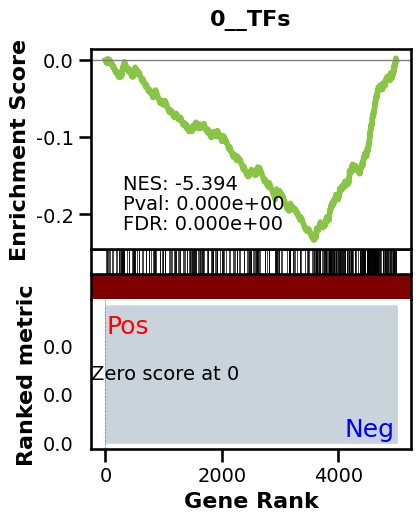

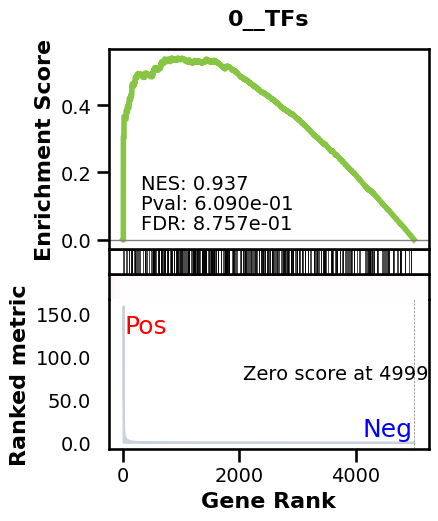

_________________________________________
TF specific enrichment


found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.97it/s]


  9%|▉         | 12/128 [00:00<00:01, 59.96it/s]


 14%|█▍        | 18/128 [00:00<00:01, 59.85it/s]


 19%|█▉        | 24/128 [00:00<00:01, 59.82it/s]


 23%|██▎       | 30/128 [00:00<00:01, 59.81it/s]


 28%|██▊       | 36/128 [00:00<00:01, 59.84it/s]


 34%|███▎      | 43/128 [00:00<00:01, 59.91it/s]


 38%|███▊      | 49/128 [00:00<00:01, 59.87it/s]


 43%|████▎     | 55/128 [00:00<00:01, 59.88it/s]


 48%|████▊     | 61/128 [00:01<00:01, 59.91it/s]


 52%|█████▏    | 67/128 [00:01<00:01, 59.92it/s]


 57%|█████▋    | 73/128 [00:01<00:00, 59.91it/s]


 62%|██████▏   | 79/128 [00:01<00:00, 59.87it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 59.66it/s]


 71%|███████   | 91/128 [00:01<00:00, 59.72it/s]


 76%|███████▌  | 97/128 [00:01<00:00, 59.72it/s]


 80%|████████  | 103/128 [00:01<00:00, 59.64it/s]


 85%|████████▌ | 109/128 [00:01<00:00, 59.70it/s]


 90%|████████▉ | 115/128 [00:01<00:00, 59.01it/s]


 95%|█████████▍| 121/128 [00:02<00:00, 59.21it/s]


 99%|█████████▉| 127/128 [00:02<00:00, 59.44it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.63it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0007873681884110279


EPR: 2.5405367736538653


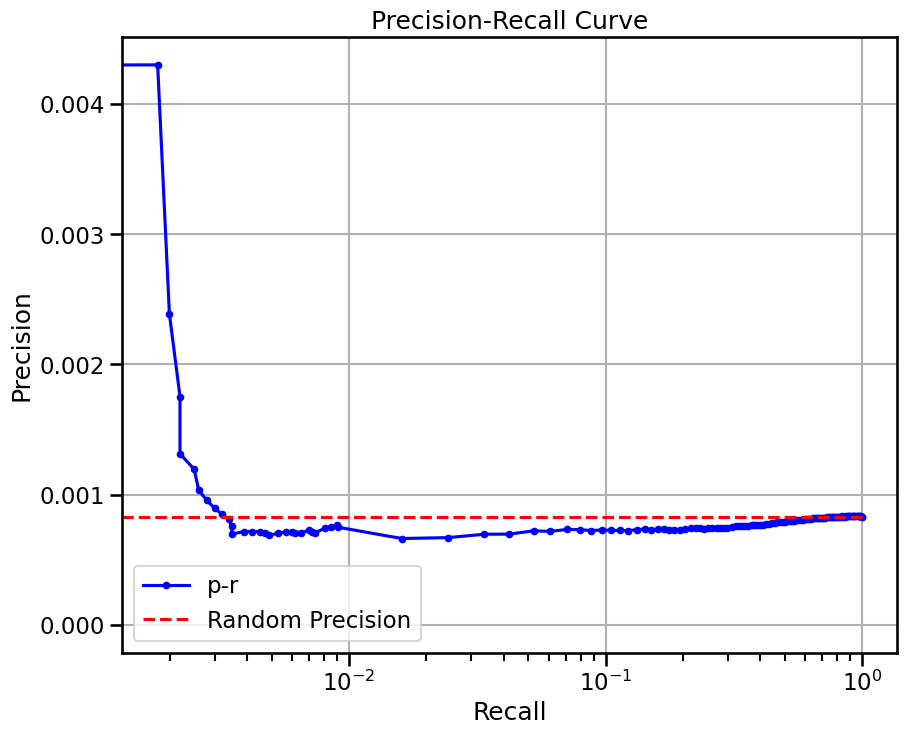

base enrichment


Top central genes: []


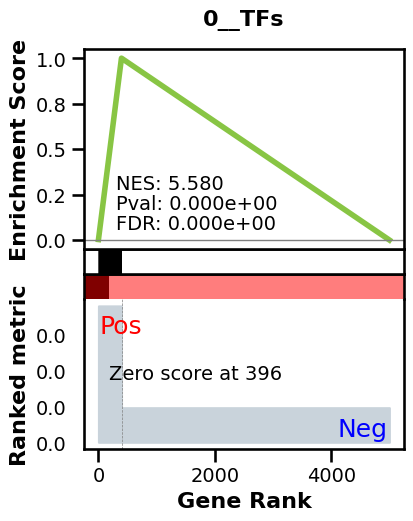

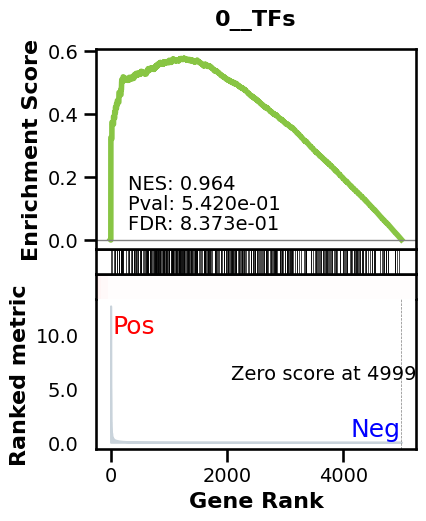

_________________________________________
TF specific enrichment


found some significant results for  11.764705882352942 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.27it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.53it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.62it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.60it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.60it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.76it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.81it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.85it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.73it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.84it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.67it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.80it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.54it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.69it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.79it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.74it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.70it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.64it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.60it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.62it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.61it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.64it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001694100341837361
EPR: 4.001868037570561


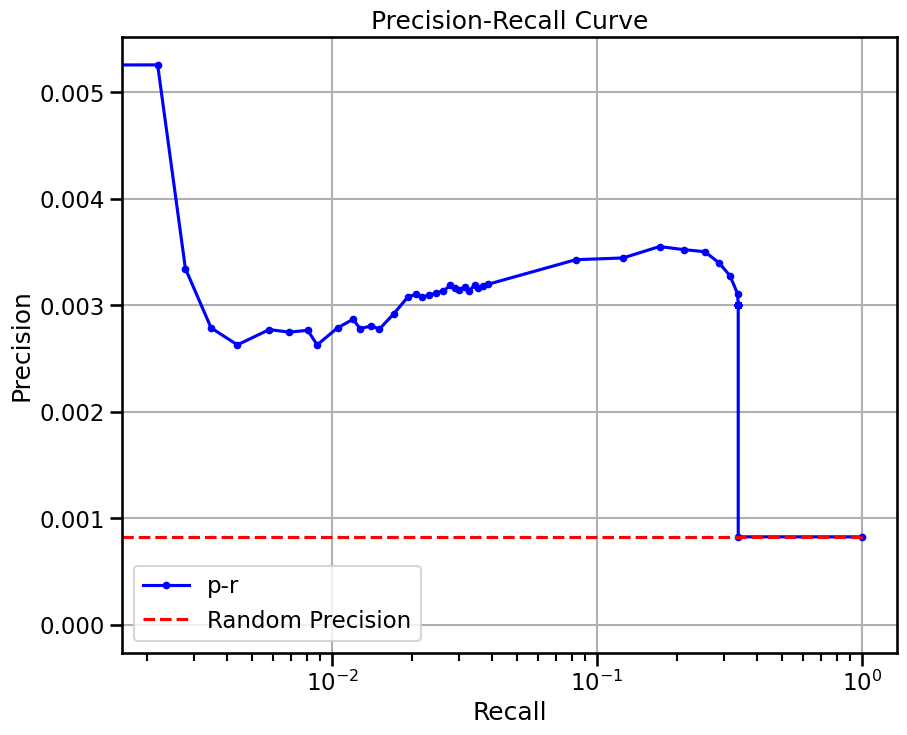

true elem 10028 ...


doing classification....


metrics {'used_heads': 1, 'precision': 0.0008314620117426245, 'random_precision': 0.0008314620117426245, 'recall': 1.0, 'predicted_true': 4855303.0, 'number_of_true': 4037.0}


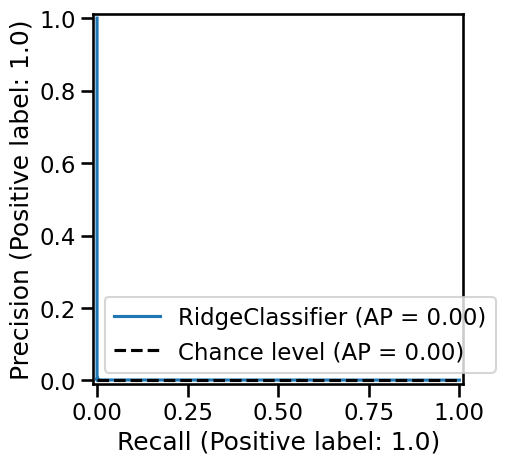

base enrichment


Top central genes: []


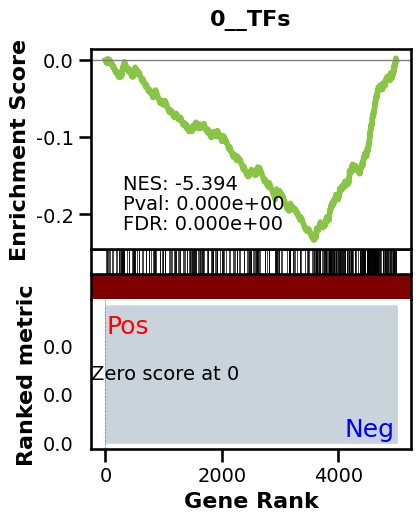

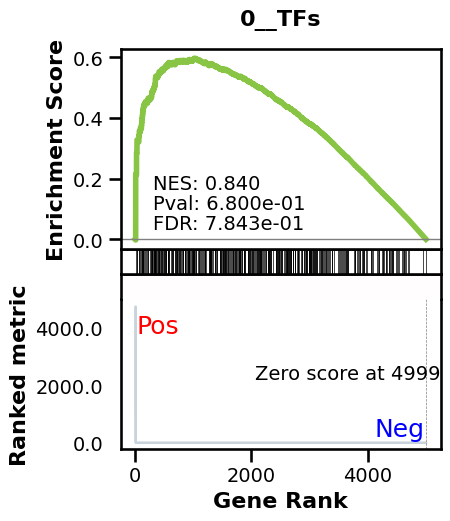

_________________________________________
TF specific enrichment


found some significant results for  17.647058823529413 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.74it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.77it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.79it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.79it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.72it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.76it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.74it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.75it/s]


 42%|████▏     | 54/128 [00:00<00:01, 56.77it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.78it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.75it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.99it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.11it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.29it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.44it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.54it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.57it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.64it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.66it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.63it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.72it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.57it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011078237566287201
EPR: 3.026868856268042


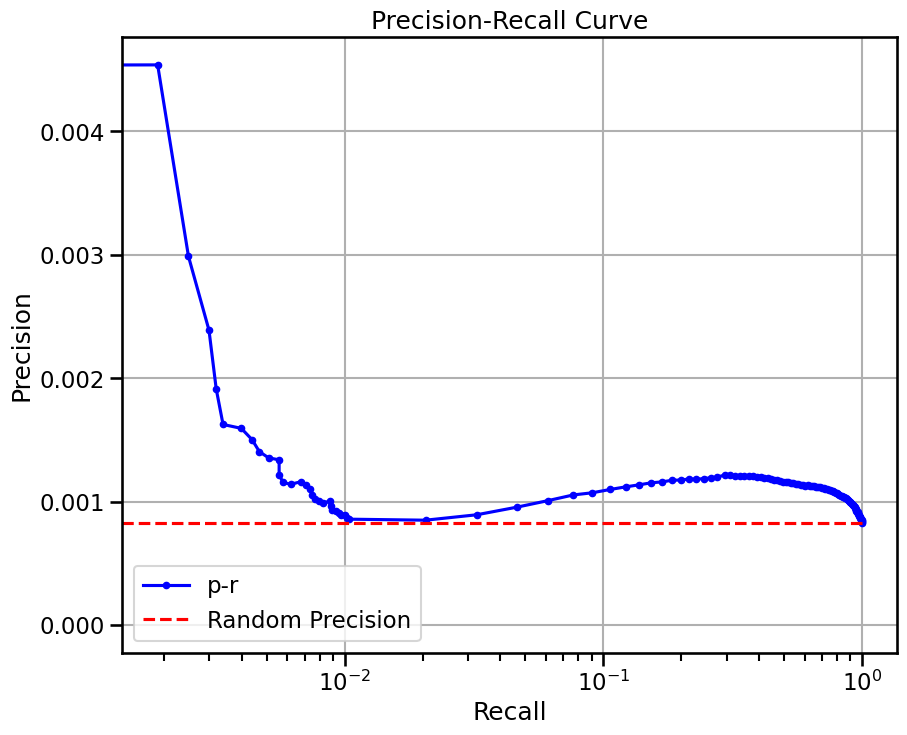

base enrichment


Top central genes: []


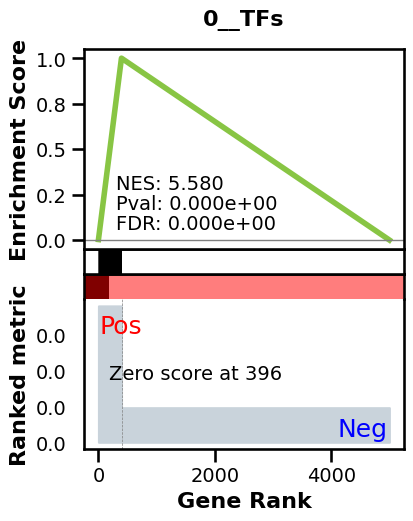

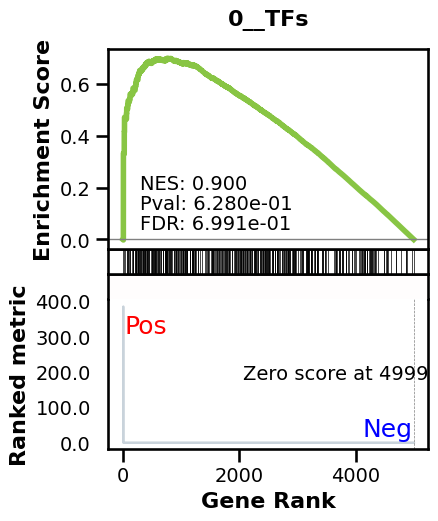

_________________________________________
TF specific enrichment


found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:02, 59.98it/s]


 11%|█         | 14/128 [00:00<00:01, 60.05it/s]


 16%|█▋        | 21/128 [00:00<00:01, 59.88it/s]


 21%|██        | 27/128 [00:00<00:01, 59.88it/s]


 27%|██▋       | 34/128 [00:00<00:01, 59.96it/s]


 31%|███▏      | 40/128 [00:00<00:01, 59.89it/s]


 36%|███▌      | 46/128 [00:00<00:01, 59.59it/s]


 41%|████      | 52/128 [00:00<00:01, 59.71it/s]


 46%|████▌     | 59/128 [00:00<00:01, 59.97it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 60.10it/s]


 57%|█████▋    | 73/128 [00:01<00:00, 60.03it/s]


 62%|██████▎   | 80/128 [00:01<00:00, 60.06it/s]


 68%|██████▊   | 87/128 [00:01<00:00, 60.07it/s]


 73%|███████▎  | 94/128 [00:01<00:00, 60.01it/s]


 79%|███████▉  | 101/128 [00:01<00:00, 59.43it/s]


 84%|████████▎ | 107/128 [00:01<00:00, 59.18it/s]


 88%|████████▊ | 113/128 [00:01<00:00, 58.95it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 58.71it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 58.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 59.41it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0031875860982082784
EPR: 11.039794481875372


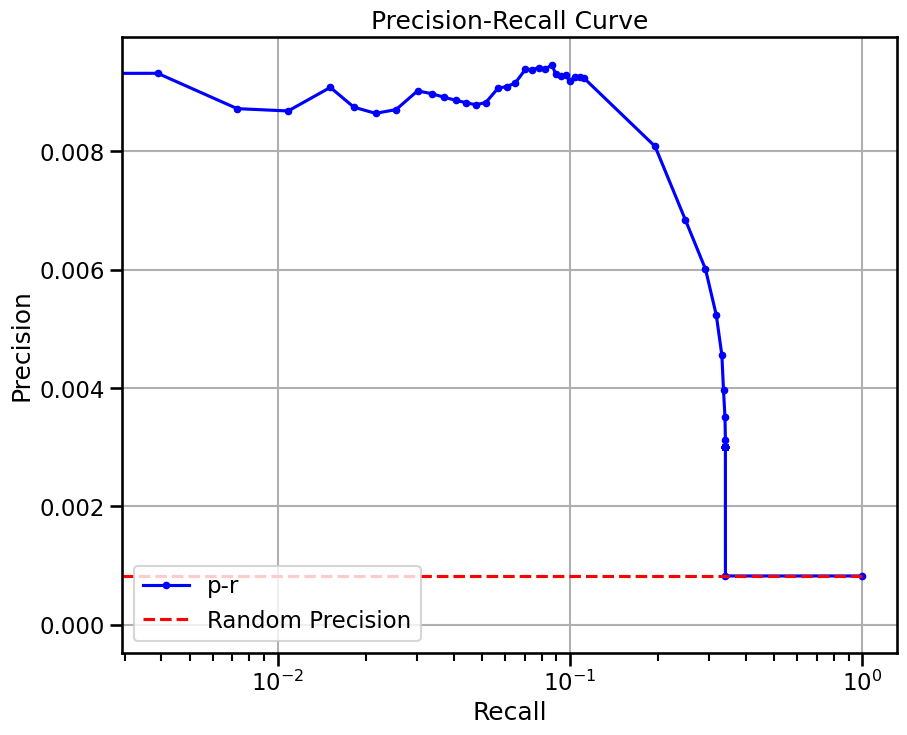


  0%|          | 0/11 [00:00<?, ?it/s]


  9%|▉         | 1/11 [00:02<00:20,  2.02s/it]


 18%|█▊        | 2/11 [00:02<00:08,  1.01it/s]


 27%|██▋       | 3/11 [00:02<00:05,  1.53it/s]


 36%|███▋      | 4/11 [00:02<00:03,  2.00it/s]


 45%|████▌     | 5/11 [00:03<00:02,  2.42it/s]


 55%|█████▍    | 6/11 [00:03<00:02,  2.24it/s]


 64%|██████▎   | 7/11 [00:03<00:01,  2.59it/s]


 73%|███████▎  | 8/11 [00:04<00:01,  2.89it/s]


 82%|████████▏ | 9/11 [00:04<00:00,  3.01it/s]


 91%|█████████ | 10/11 [00:04<00:00,  3.25it/s]


100%|██████████| 11/11 [00:04<00:00,  3.57it/s]


100%|██████████| 11/11 [00:05<00:00,  2.17it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


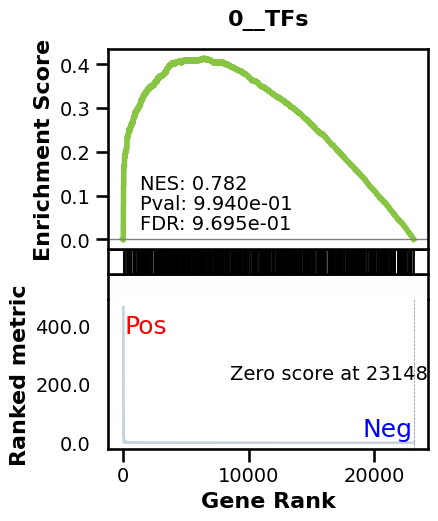

_________________________________________
TF specific enrichment


found some significant results for  71.42857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:29,  4.31it/s]


  2%|▏         | 2/128 [00:00<00:29,  4.24it/s]


  2%|▏         | 3/128 [00:00<00:29,  4.29it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.30it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.30it/s]


  5%|▍         | 6/128 [00:01<00:28,  4.32it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.33it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.33it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.34it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.33it/s]


  9%|▊         | 11/128 [00:02<00:27,  4.33it/s]


  9%|▉         | 12/128 [00:02<00:28,  4.09it/s]


 10%|█         | 13/128 [00:03<00:27,  4.17it/s]


 11%|█         | 14/128 [00:03<00:27,  4.20it/s]


 12%|█▏        | 15/128 [00:03<00:26,  4.24it/s]


 12%|█▎        | 16/128 [00:03<00:26,  4.26it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.29it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.30it/s]


 15%|█▍        | 19/128 [00:04<00:25,  4.31it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.32it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.33it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.32it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.34it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.34it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.34it/s]


 20%|██        | 26/128 [00:06<00:23,  4.35it/s]


 21%|██        | 27/128 [00:06<00:23,  4.35it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.35it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.34it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.35it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.36it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.35it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.34it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.34it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.34it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.35it/s]


 29%|██▉       | 37/128 [00:08<00:21,  4.33it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.34it/s]


 30%|███       | 39/128 [00:09<00:20,  4.34it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.33it/s]


 32%|███▏      | 41/128 [00:09<00:20,  4.33it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.35it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.34it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.33it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.33it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.34it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.32it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.34it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.34it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.34it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.35it/s]


 41%|████      | 52/128 [00:12<00:17,  4.37it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.38it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.38it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.40it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.40it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.41it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.41it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.41it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.42it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.42it/s]


 48%|████▊     | 62/128 [00:14<00:14,  4.42it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.41it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.40it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.40it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.39it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.40it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.39it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.39it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.39it/s]


 55%|█████▌    | 71/128 [00:16<00:12,  4.39it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.41it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.41it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.40it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.41it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.41it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.41it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.41it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.42it/s]


 62%|██████▎   | 80/128 [00:18<00:10,  4.42it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.41it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.39it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.40it/s]


 66%|██████▌   | 84/128 [00:19<00:09,  4.40it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.41it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.42it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.41it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.41it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.42it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.43it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.43it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.43it/s]


 73%|███████▎  | 93/128 [00:21<00:07,  4.42it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.42it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.41it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.41it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.40it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.39it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.39it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.37it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.37it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.39it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.38it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.39it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.40it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.40it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.37it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.36it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.36it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.38it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.38it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.38it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.38it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.39it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.39it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.39it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.40it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.39it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.41it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.42it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.41it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.41it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.42it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.42it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.41it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.41it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.41it/s]


100%|██████████| 128/128 [00:29<00:00,  4.37it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009910819710732314


EPR: 2.2364579741690718


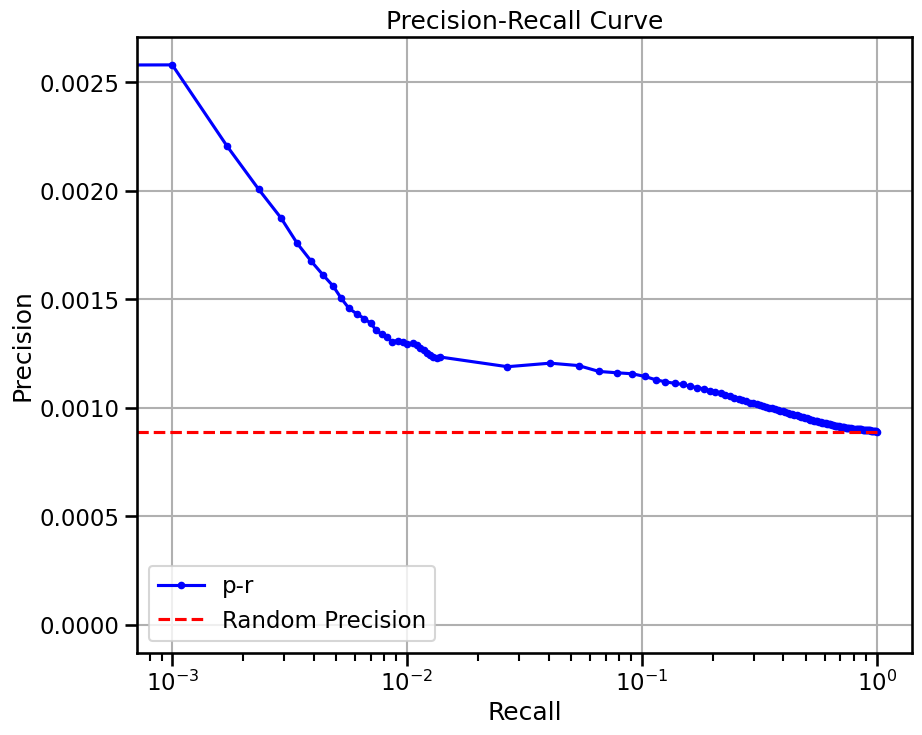


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:01<00:30,  1.47s/it]


  9%|▉         | 2/22 [00:01<00:17,  1.17it/s]


 14%|█▎        | 3/22 [00:02<00:11,  1.69it/s]


 18%|█▊        | 4/22 [00:02<00:08,  2.12it/s]


 23%|██▎       | 5/22 [00:02<00:06,  2.46it/s]


 27%|██▋       | 6/22 [00:03<00:05,  2.71it/s]


 32%|███▏      | 7/22 [00:03<00:05,  2.82it/s]


 36%|███▋      | 8/22 [00:03<00:04,  2.95it/s]


 41%|████      | 9/22 [00:03<00:04,  3.12it/s]


 45%|████▌     | 10/22 [00:04<00:03,  3.23it/s]


 50%|█████     | 11/22 [00:04<00:03,  3.31it/s]


 55%|█████▍    | 12/22 [00:04<00:02,  3.37it/s]


 59%|█████▉    | 13/22 [00:05<00:02,  3.42it/s]


 64%|██████▎   | 14/22 [00:05<00:02,  3.44it/s]


 68%|██████▊   | 15/22 [00:05<00:02,  3.46it/s]


 73%|███████▎  | 16/22 [00:05<00:01,  3.49it/s]


 77%|███████▋  | 17/22 [00:06<00:01,  3.33it/s]


 82%|████████▏ | 18/22 [00:06<00:01,  3.39it/s]


 86%|████████▋ | 19/22 [00:06<00:00,  3.43it/s]


 91%|█████████ | 20/22 [00:07<00:00,  3.46it/s]


 95%|█████████▌| 21/22 [00:07<00:00,  3.48it/s]


100%|██████████| 22/22 [00:07<00:00,  3.82it/s]


100%|██████████| 22/22 [00:07<00:00,  2.81it/s]

base enrichment


Top central genes: []


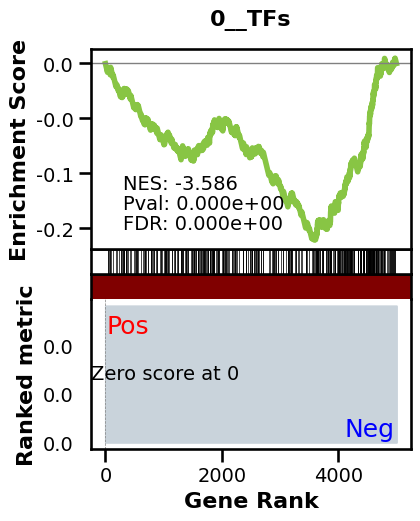

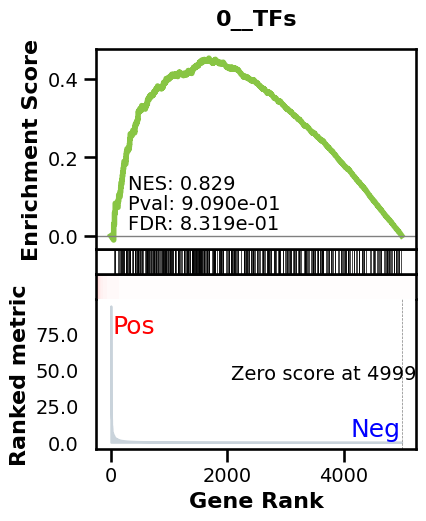

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.56it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.69it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.69it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.58it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.55it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.58it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.59it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.55it/s]


 42%|████▏     | 54/128 [00:00<00:01, 56.57it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.61it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.57it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.65it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.68it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.60it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.59it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.53it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.62it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.58it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.57it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.62it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.63it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.57it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001254264864453389
EPR: 0.6113819190520718


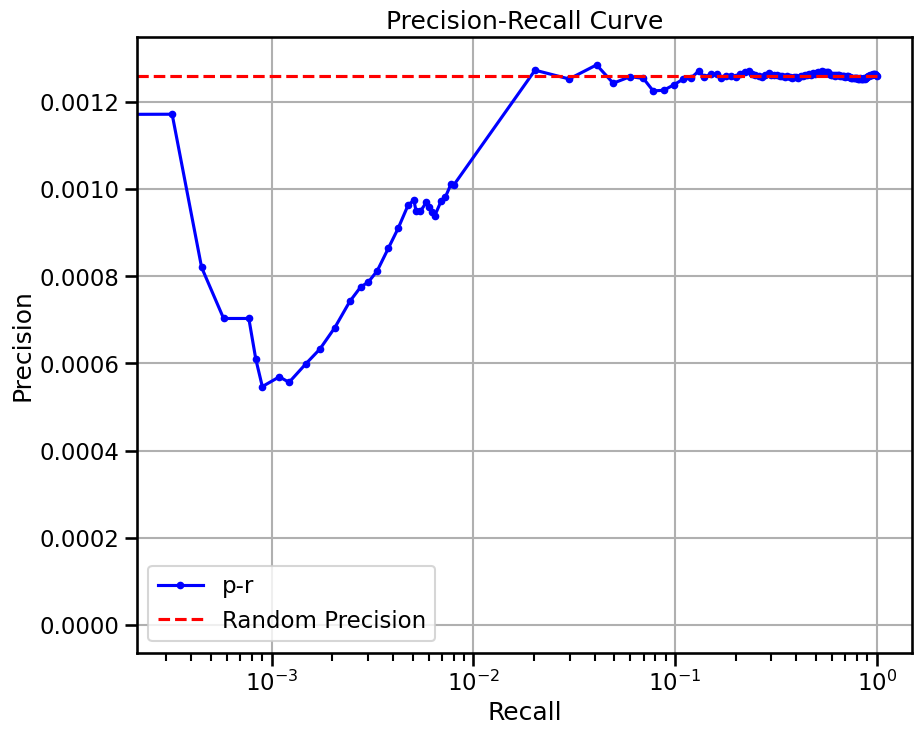

base enrichment


Top central genes: []


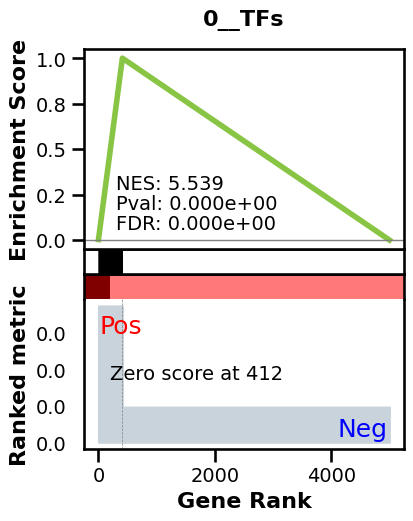

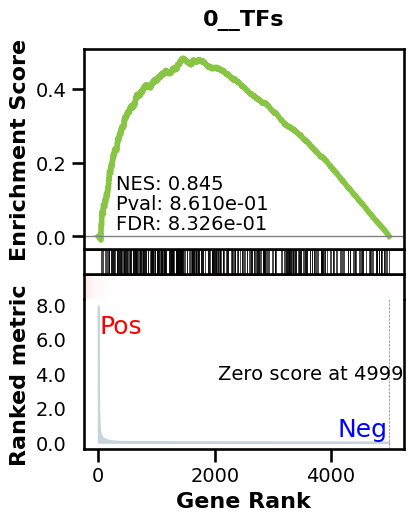

_________________________________________
TF specific enrichment


found some significant results for  3.125 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.005945748396004223 
recall:  0.4700179763739086 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.37it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.41it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.42it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.34it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.15it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.20it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.22it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.43it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.04it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.48it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.74it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.87it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.99it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.11it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.25it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.33it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.01it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.15it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.23it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.32it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.27it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.99it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0038424142171923446


EPR: 4.059831154043062


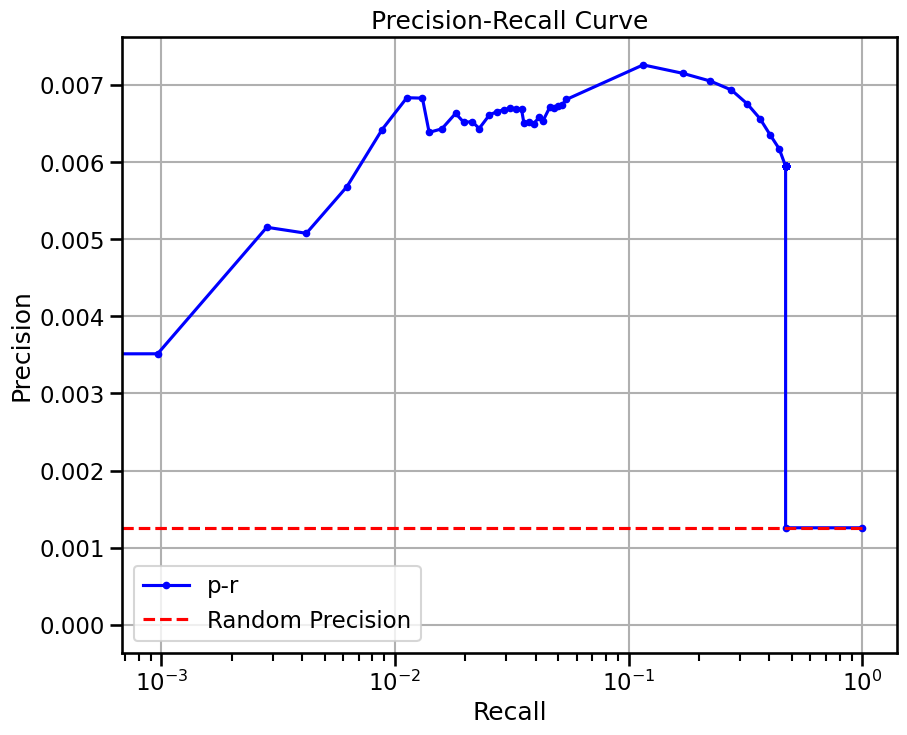

base enrichment


Top central genes: []


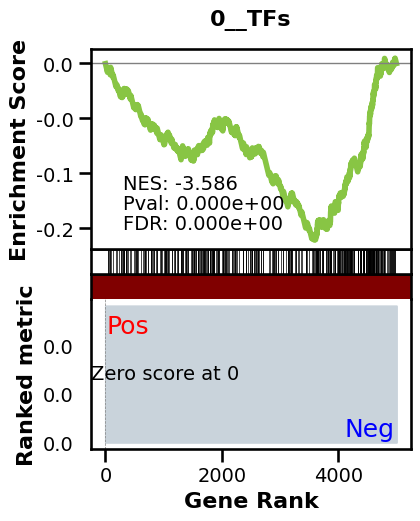

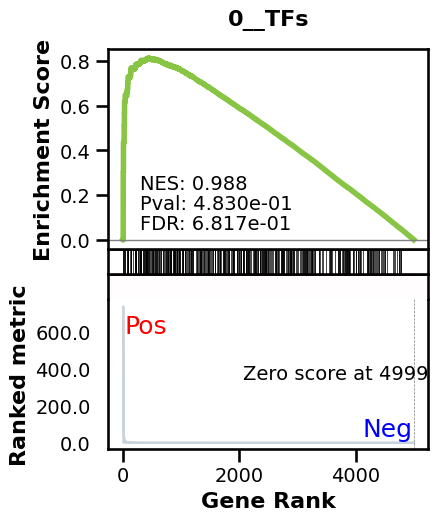

_________________________________________
TF specific enrichment


found some significant results for  26.5625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.92it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.20it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.15it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.44it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.61it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.71it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.66it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.76it/s]


 42%|████▏     | 54/128 [00:00<00:01, 56.79it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.85it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.85it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.88it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.89it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.86it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.84it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.92it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.91it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.87it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.90it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.97it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.99it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.76it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017438661505795915


EPR: 0.917780806225905


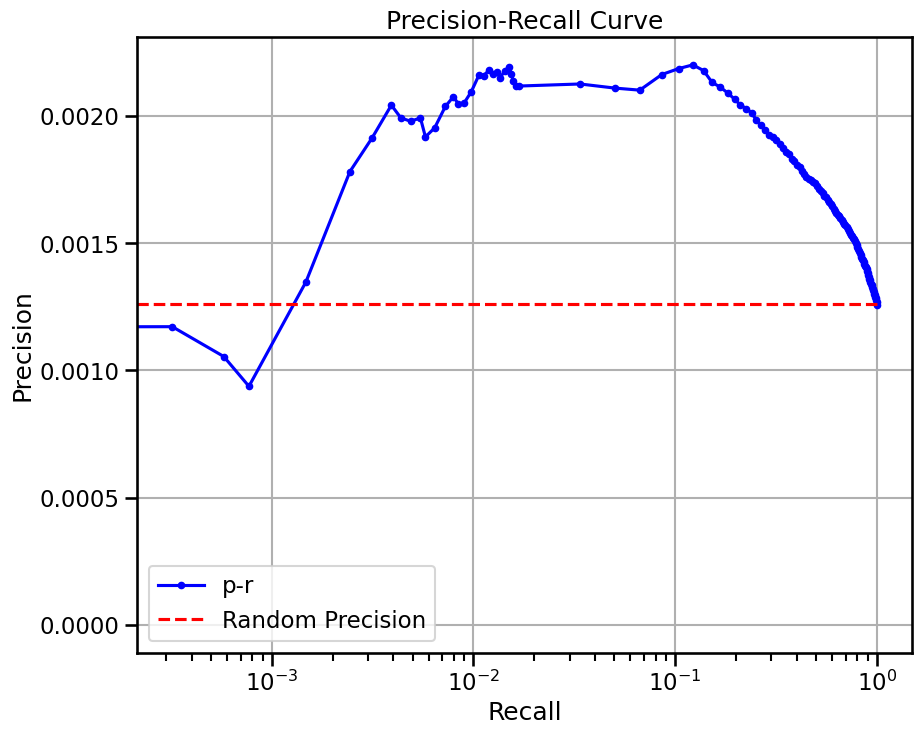

base enrichment


Top central genes: []


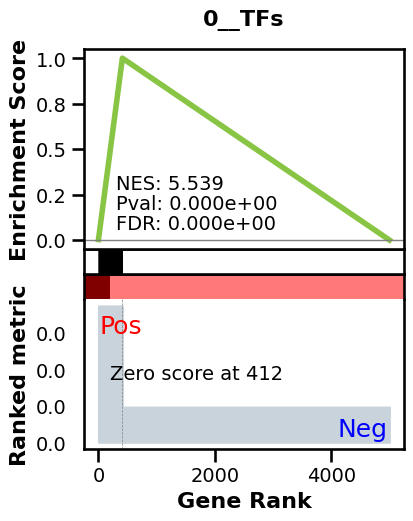

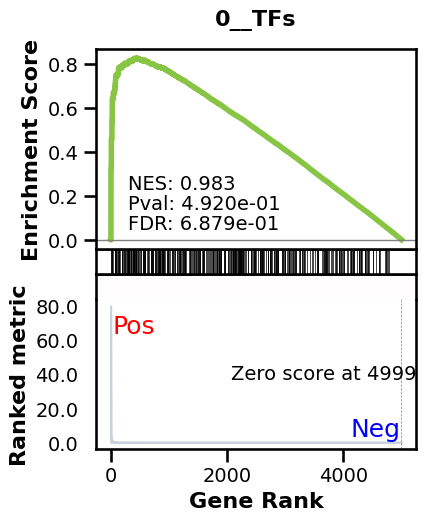

_________________________________________
TF specific enrichment


found some significant results for  14.0625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.005945748396004223 
recall:  0.4700179763739086 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.65it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.56it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.50it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.54it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.26it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.36it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.47it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.51it/s]


 42%|████▏     | 54/128 [00:00<00:01, 56.58it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.61it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.64it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.56it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.58it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.56it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.64it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.67it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.42it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.45it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.51it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.48it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.52it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.49it/s]

Area Under Precision-Recall Curve (AUPRC):  0.006140072346196828
EPR: 11.299319458007812


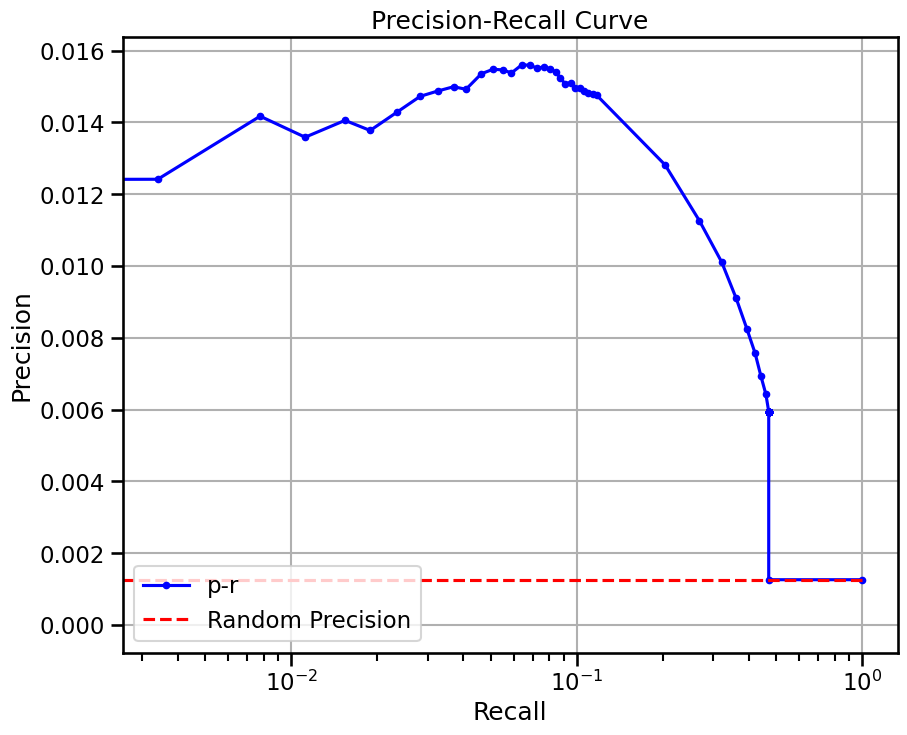


  0%|          | 0/11 [00:00<?, ?it/s]


  9%|▉         | 1/11 [00:03<00:39,  3.97s/it]


 18%|█▊        | 2/11 [00:06<00:26,  2.89s/it]


 27%|██▋       | 3/11 [00:06<00:13,  1.69s/it]


 36%|███▋      | 4/11 [00:06<00:07,  1.13s/it]


 45%|████▌     | 5/11 [00:06<00:04,  1.23it/s]


 55%|█████▍    | 6/11 [00:07<00:03,  1.59it/s]


 64%|██████▎   | 7/11 [00:07<00:02,  1.96it/s]


 73%|███████▎  | 8/11 [00:07<00:01,  2.32it/s]


 82%|████████▏ | 9/11 [00:07<00:00,  2.65it/s]


 91%|█████████ | 10/11 [00:08<00:00,  2.94it/s]


100%|██████████| 11/11 [00:08<00:00,  3.19it/s]


100%|██████████| 11/11 [00:08<00:00,  1.26it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


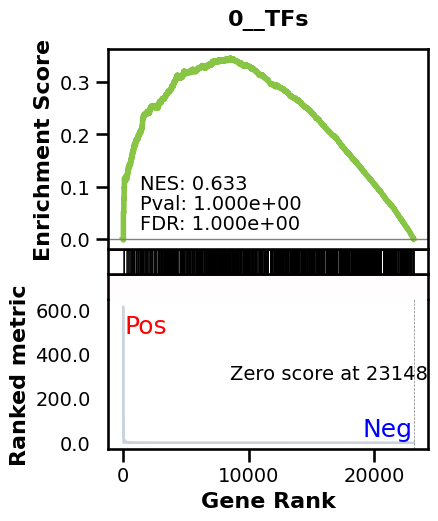

_________________________________________
TF specific enrichment


found some significant results for  72.32142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:28,  4.38it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.39it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.40it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.40it/s]


  4%|▍         | 5/128 [00:01<00:27,  4.39it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.41it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.42it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.42it/s]


  7%|▋         | 9/128 [00:02<00:26,  4.42it/s]


  8%|▊         | 10/128 [00:02<00:26,  4.42it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.42it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.42it/s]


 10%|█         | 13/128 [00:02<00:26,  4.42it/s]


 11%|█         | 14/128 [00:03<00:25,  4.42it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.41it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.40it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.40it/s]


 14%|█▍        | 18/128 [00:04<00:24,  4.40it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.40it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.40it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.41it/s]


 17%|█▋        | 22/128 [00:04<00:24,  4.41it/s]


 18%|█▊        | 23/128 [00:05<00:23,  4.41it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.41it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.42it/s]


 20%|██        | 26/128 [00:05<00:23,  4.42it/s]


 21%|██        | 27/128 [00:06<00:22,  4.42it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.41it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.40it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.40it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.41it/s]


 25%|██▌       | 32/128 [00:07<00:21,  4.42it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.43it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.43it/s]


 27%|██▋       | 35/128 [00:07<00:20,  4.43it/s]


 28%|██▊       | 36/128 [00:08<00:20,  4.42it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.41it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.42it/s]


 30%|███       | 39/128 [00:08<00:20,  4.42it/s]


 31%|███▏      | 40/128 [00:09<00:19,  4.42it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.43it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.42it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.42it/s]


 34%|███▍      | 44/128 [00:09<00:19,  4.42it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.42it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.41it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.41it/s]


 38%|███▊      | 48/128 [00:10<00:18,  4.41it/s]


 38%|███▊      | 49/128 [00:11<00:17,  4.42it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.42it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.43it/s]


 41%|████      | 52/128 [00:11<00:17,  4.44it/s]


 41%|████▏     | 53/128 [00:12<00:16,  4.43it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.43it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.42it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.42it/s]


 45%|████▍     | 57/128 [00:12<00:16,  4.40it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.41it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.41it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.41it/s]


 48%|████▊     | 61/128 [00:13<00:15,  4.41it/s]


 48%|████▊     | 62/128 [00:14<00:14,  4.41it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.39it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.38it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.38it/s]


 52%|█████▏    | 66/128 [00:14<00:14,  4.39it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.39it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.39it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.40it/s]


 55%|█████▍    | 70/128 [00:15<00:13,  4.40it/s]


 55%|█████▌    | 71/128 [00:16<00:12,  4.41it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.39it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.39it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.40it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.40it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.40it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.40it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.41it/s]


 62%|██████▏   | 79/128 [00:17<00:11,  4.40it/s]


 62%|██████▎   | 80/128 [00:18<00:10,  4.40it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.39it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.39it/s]


 65%|██████▍   | 83/128 [00:18<00:10,  4.37it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.37it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.36it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.36it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.37it/s]


 69%|██████▉   | 88/128 [00:19<00:09,  4.38it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.39it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.39it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.36it/s]


 72%|███████▏  | 92/128 [00:20<00:08,  4.37it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.35it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.37it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.37it/s]


 75%|███████▌  | 96/128 [00:21<00:07,  4.38it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.38it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.37it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.37it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.37it/s]


 79%|███████▉  | 101/128 [00:22<00:06,  4.38it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.39it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.39it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.38it/s]


 82%|████████▏ | 105/128 [00:23<00:05,  4.37it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.38it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.38it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.37it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.36it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.36it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.37it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.38it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.39it/s]


 89%|████████▉ | 114/128 [00:25<00:03,  4.39it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.39it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.38it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.39it/s]


 92%|█████████▏| 118/128 [00:26<00:02,  4.40it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.41it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.41it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.40it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.39it/s]


 96%|█████████▌| 123/128 [00:27<00:01,  4.40it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.41it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.41it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.41it/s]


 99%|█████████▉| 127/128 [00:28<00:00,  4.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.42it/s]


100%|██████████| 128/128 [00:29<00:00,  4.40it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010331180399422348


EPR: 1.7370207552608286


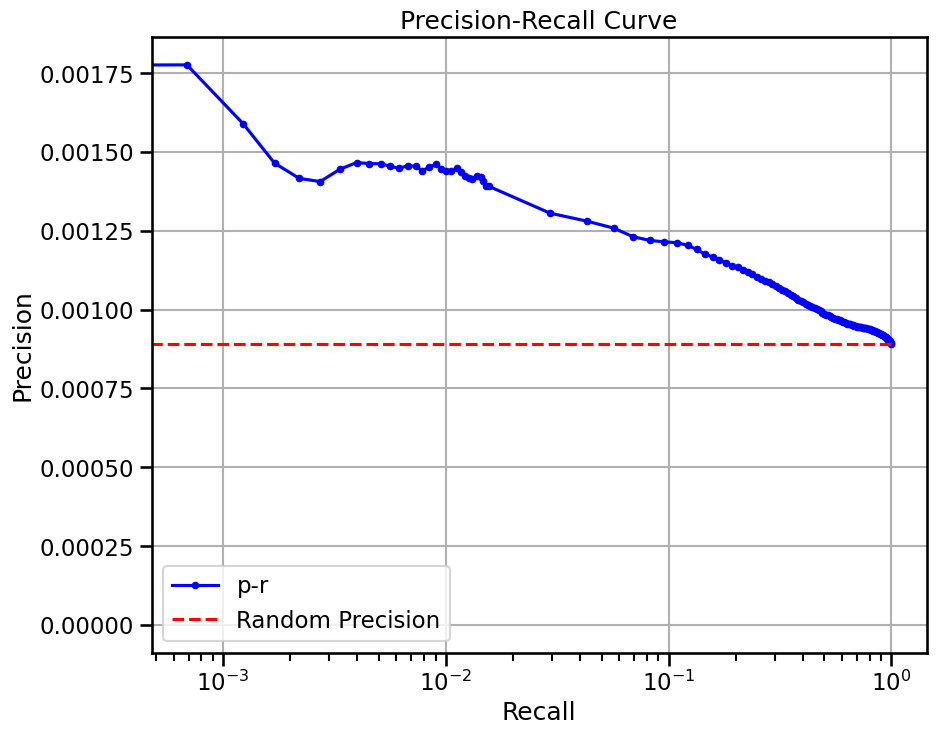


  0%|          | 0/22 [00:00<?, ?it/s]


  5%|▍         | 1/22 [00:03<01:19,  3.77s/it]


  9%|▉         | 2/22 [00:04<00:34,  1.72s/it]


 14%|█▎        | 3/22 [00:04<00:20,  1.06s/it]


 18%|█▊        | 4/22 [00:04<00:13,  1.33it/s]


 23%|██▎       | 5/22 [00:04<00:09,  1.73it/s]


 27%|██▋       | 6/22 [00:05<00:07,  2.07it/s]


 32%|███▏      | 7/22 [00:05<00:07,  2.11it/s]


 36%|███▋      | 8/22 [00:05<00:05,  2.38it/s]


 41%|████      | 9/22 [00:06<00:04,  2.60it/s]


 45%|████▌     | 10/22 [00:06<00:04,  2.78it/s]


 50%|█████     | 11/22 [00:06<00:03,  2.92it/s]


 55%|█████▍    | 12/22 [00:07<00:03,  3.03it/s]


 59%|█████▉    | 13/22 [00:07<00:02,  3.09it/s]


 64%|██████▎   | 14/22 [00:07<00:02,  3.13it/s]


 68%|██████▊   | 15/22 [00:08<00:02,  3.12it/s]


 73%|███████▎  | 16/22 [00:08<00:01,  3.18it/s]


 77%|███████▋  | 17/22 [00:08<00:01,  3.13it/s]


 82%|████████▏ | 18/22 [00:09<00:01,  3.17it/s]


 86%|████████▋ | 19/22 [00:09<00:00,  3.20it/s]


 91%|█████████ | 20/22 [00:09<00:00,  3.23it/s]


 95%|█████████▌| 21/22 [00:09<00:00,  3.25it/s]


100%|██████████| 22/22 [00:10<00:00,  3.30it/s]


100%|██████████| 22/22 [00:10<00:00,  2.10it/s]

base enrichment


Top central genes: []


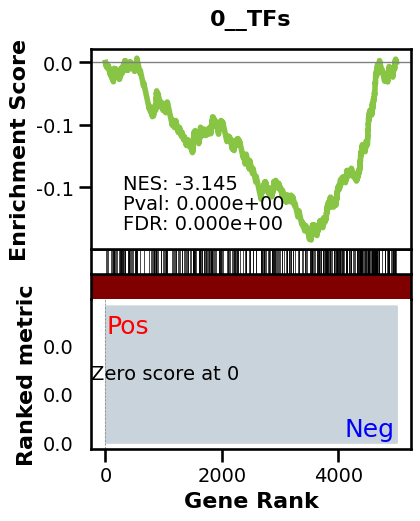

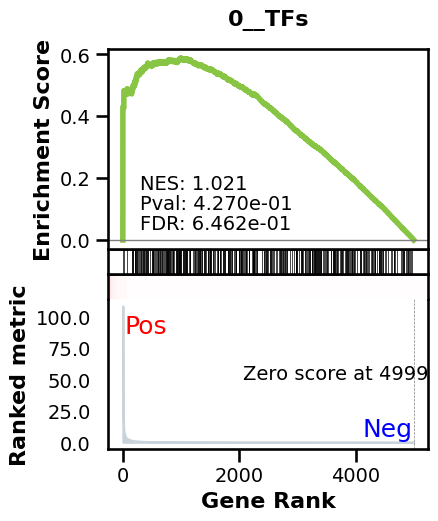

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.77it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.27it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.36it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.37it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.36it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.46it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.44it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.29it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.29it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.32it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.25it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.32it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.20it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.23it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.28it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.26it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.17it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.23it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.39it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.43it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.11it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.22it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001395036587476524


EPR: 1.257830077353196


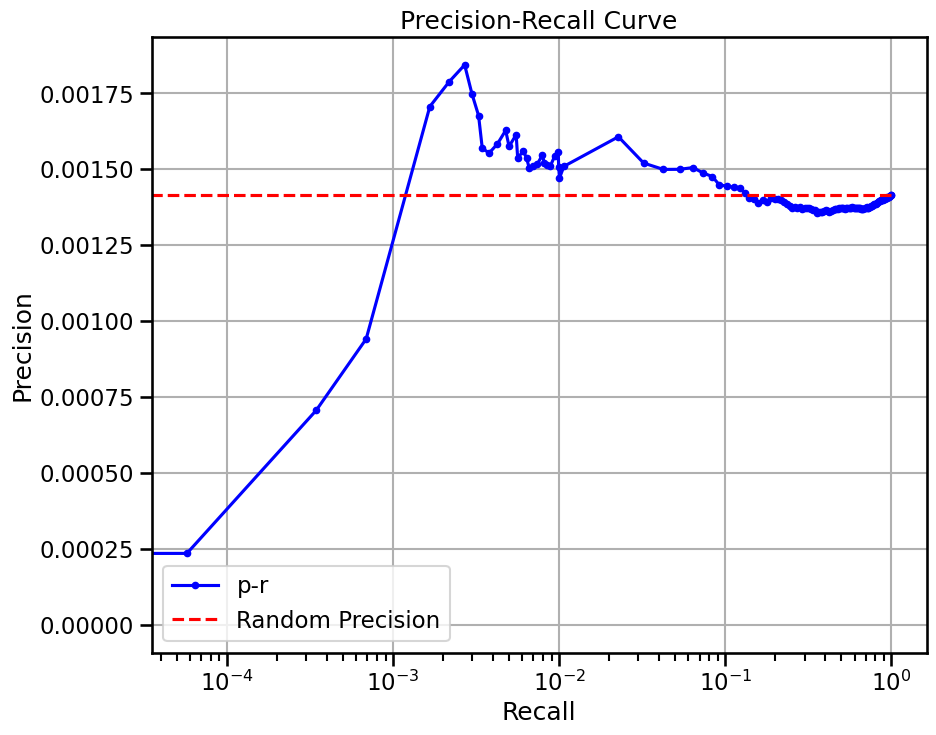

base enrichment


Top central genes: []


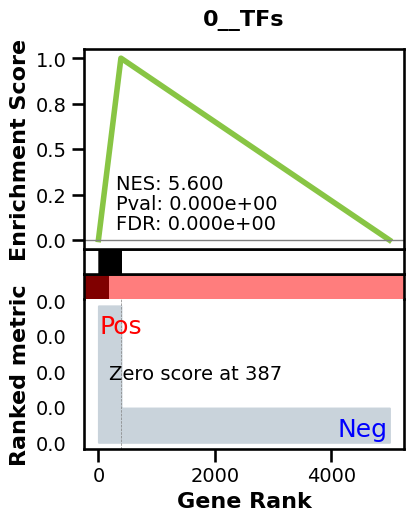

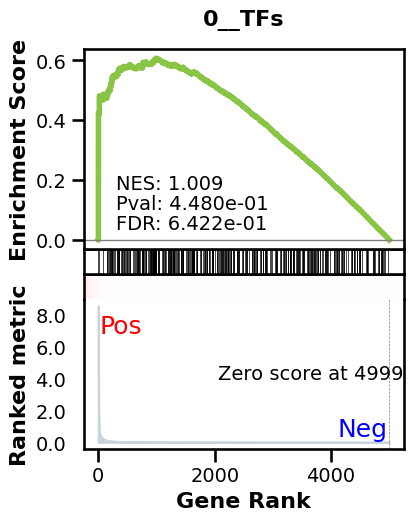

_________________________________________
TF specific enrichment


found some significant results for  2.0833333333333335 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.007612673505194292 
recall:  0.50745669381668 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 43.91it/s]


  8%|▊         | 10/128 [00:00<00:02, 43.74it/s]


 12%|█▏        | 15/128 [00:00<00:02, 43.97it/s]


 16%|█▌        | 20/128 [00:00<00:02, 43.86it/s]


 20%|█▉        | 25/128 [00:00<00:02, 43.80it/s]


 23%|██▎       | 30/128 [00:00<00:02, 43.82it/s]


 27%|██▋       | 35/128 [00:00<00:02, 43.87it/s]


 31%|███▏      | 40/128 [00:00<00:01, 44.06it/s]


 35%|███▌      | 45/128 [00:01<00:01, 43.86it/s]


 39%|███▉      | 50/128 [00:01<00:01, 43.89it/s]


 43%|████▎     | 55/128 [00:01<00:01, 43.81it/s]


 47%|████▋     | 60/128 [00:01<00:01, 43.89it/s]


 51%|█████     | 65/128 [00:01<00:01, 44.04it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 44.00it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 44.02it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 43.76it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 43.55it/s]


 70%|███████   | 90/128 [00:02<00:00, 43.69it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 43.67it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 43.69it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 43.73it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 43.80it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 43.85it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 43.83it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 43.86it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 43.82it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004658811645490416
EPR: 7.388169594759636


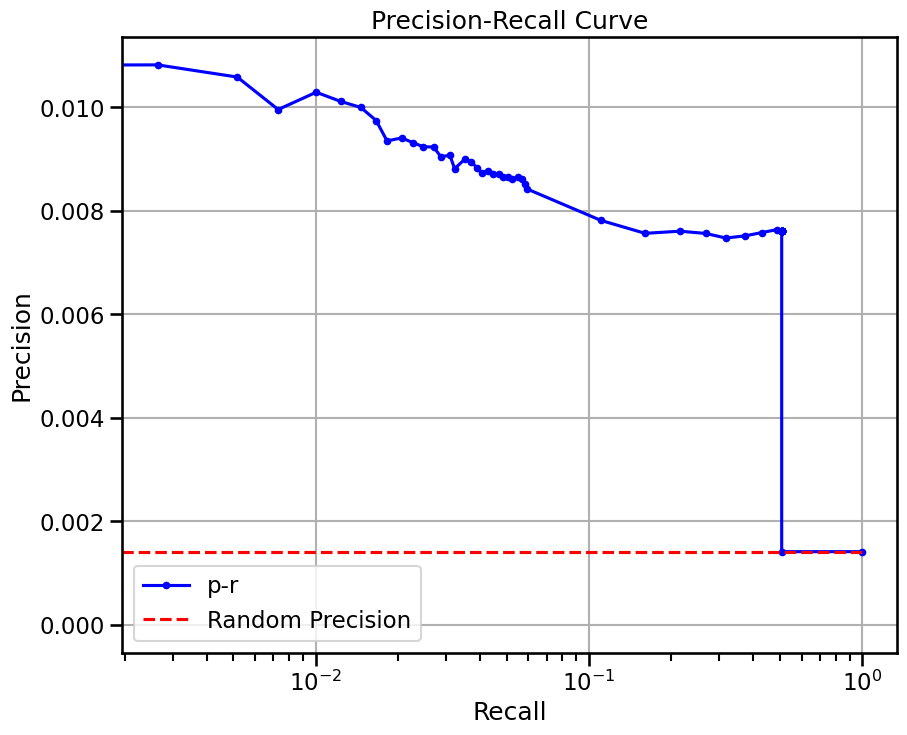

base enrichment


Top central genes: []


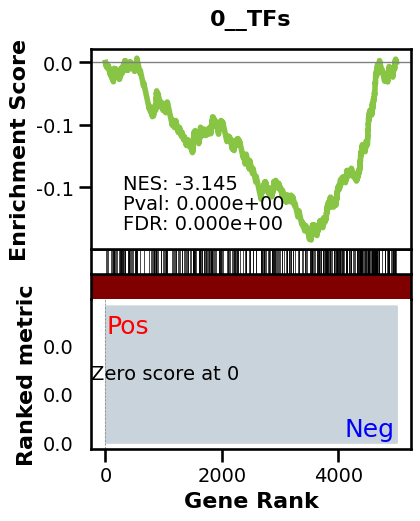

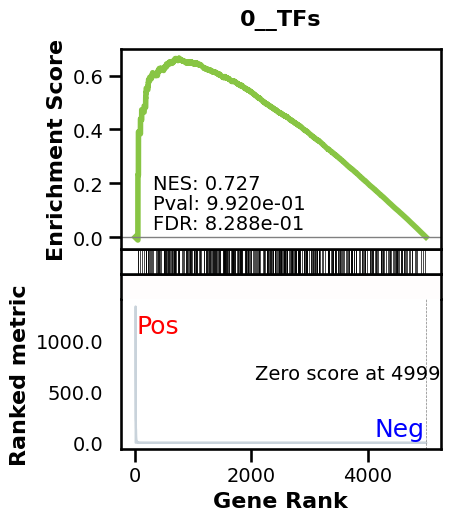

_________________________________________
TF specific enrichment


found some significant results for  2.0833333333333335 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.70it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.58it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.60it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.53it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.51it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.51it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.50it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.54it/s]


 42%|████▏     | 54/128 [00:00<00:01, 56.51it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.57it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 56.62it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 56.67it/s]


 61%|██████    | 78/128 [00:01<00:00, 56.68it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 56.59it/s]


 70%|███████   | 90/128 [00:01<00:00, 56.62it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 56.67it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 56.66it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 56.68it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.67it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.60it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.67it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 56.58it/s]

Area Under Precision-Recall Curve (AUPRC):  0.002029061366680752
EPR: 0.9323707578841994


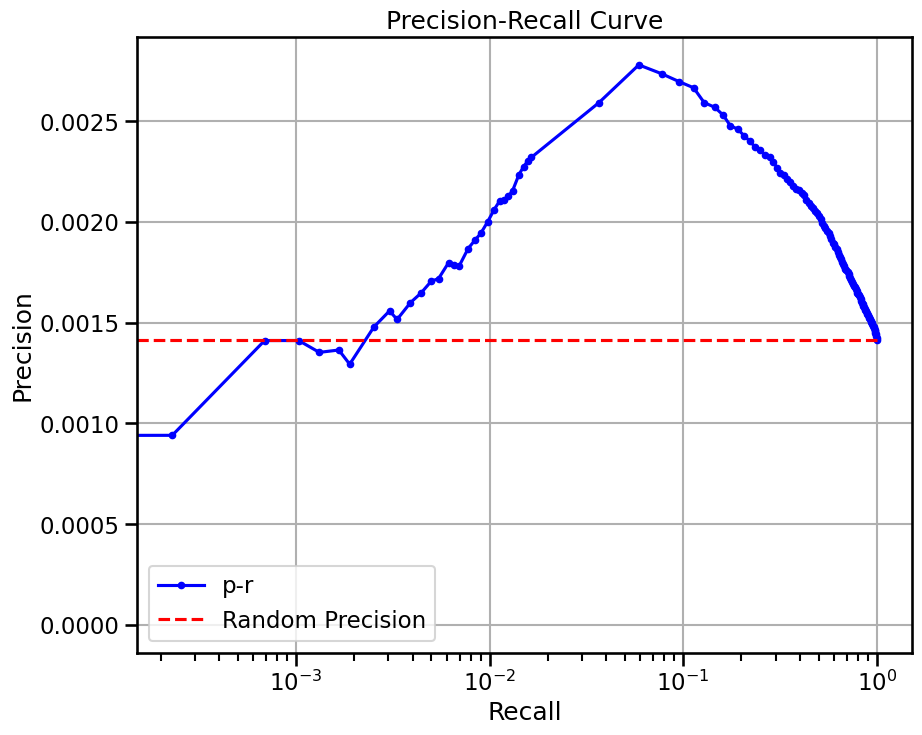

base enrichment


Top central genes: []


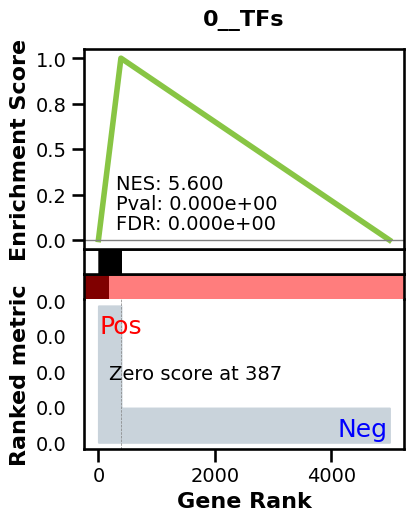

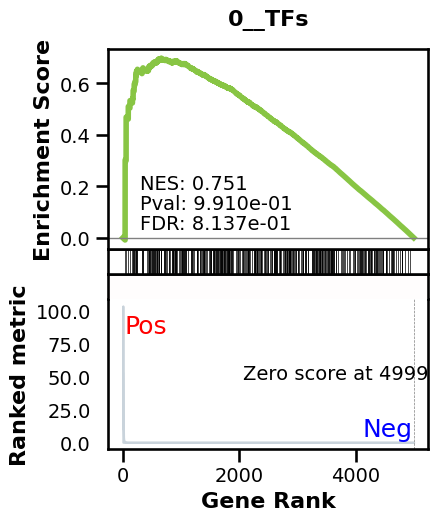

_________________________________________
TF specific enrichment


found some significant results for  2.0833333333333335 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.007612673505194292 
recall:  0.50745669381668 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.13it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.61it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.74it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.83it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.67it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.61it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.70it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.70it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.76it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.80it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.77it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.77it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.00it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.28it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.30it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.43it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.68it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.74it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.65it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.65it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.65it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.58it/s]

Area Under Precision-Recall Curve (AUPRC):  0.007180681143606399
EPR: 12.384809227670717


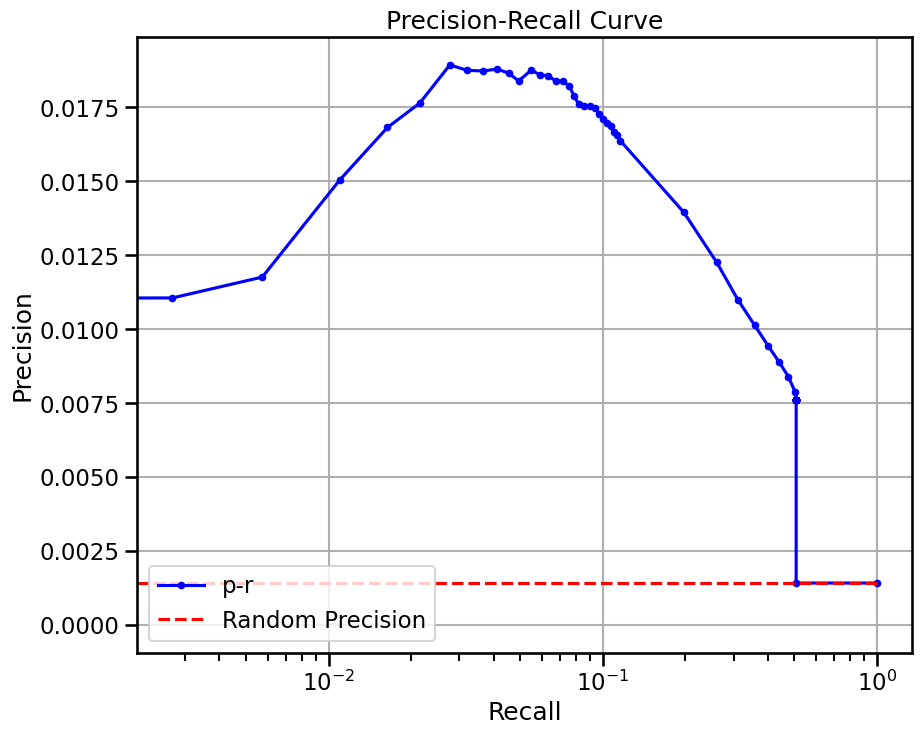


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [00:01<00:01,  1.45s/it]


100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

avg link count: 487526400, sparsity: 1.0


base enrichment


too many genes for central computation


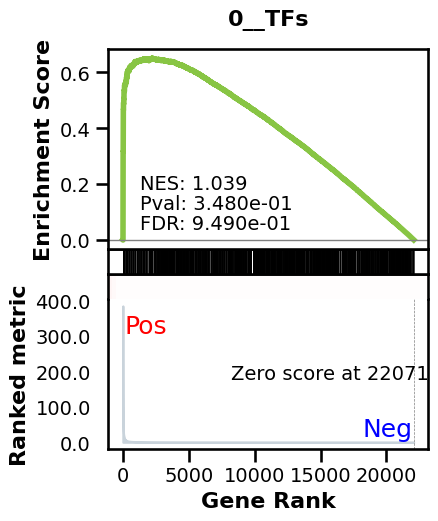

_________________________________________
TF specific enrichment


found some significant results for  71.42857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12018 genes
intersection pct: 0.5444907575208409


precision:  0.0009088201059480286 
recall:  1.0 
random precision: 0.0009088957338173761



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:33,  3.82it/s]


  2%|▏         | 2/128 [00:00<00:32,  3.83it/s]


  2%|▏         | 3/128 [00:00<00:32,  3.83it/s]


  3%|▎         | 4/128 [00:01<00:32,  3.84it/s]


  4%|▍         | 5/128 [00:01<00:32,  3.84it/s]


  5%|▍         | 6/128 [00:01<00:31,  3.84it/s]


  5%|▌         | 7/128 [00:01<00:31,  3.84it/s]


  6%|▋         | 8/128 [00:02<00:31,  3.84it/s]


  7%|▋         | 9/128 [00:02<00:30,  3.84it/s]


  8%|▊         | 10/128 [00:02<00:30,  3.84it/s]


  9%|▊         | 11/128 [00:02<00:30,  3.85it/s]


  9%|▉         | 12/128 [00:03<00:30,  3.84it/s]


 10%|█         | 13/128 [00:03<00:30,  3.83it/s]


 11%|█         | 14/128 [00:03<00:29,  3.83it/s]


 12%|█▏        | 15/128 [00:03<00:29,  3.84it/s]


 12%|█▎        | 16/128 [00:04<00:29,  3.84it/s]


 13%|█▎        | 17/128 [00:04<00:28,  3.85it/s]


 14%|█▍        | 18/128 [00:04<00:28,  3.85it/s]


 15%|█▍        | 19/128 [00:04<00:28,  3.85it/s]


 16%|█▌        | 20/128 [00:05<00:27,  3.86it/s]


 16%|█▋        | 21/128 [00:05<00:27,  3.86it/s]


 17%|█▋        | 22/128 [00:05<00:27,  3.86it/s]


 18%|█▊        | 23/128 [00:05<00:27,  3.86it/s]


 19%|█▉        | 24/128 [00:06<00:26,  3.86it/s]


 20%|█▉        | 25/128 [00:06<00:26,  3.85it/s]


 20%|██        | 26/128 [00:06<00:26,  3.84it/s]


 21%|██        | 27/128 [00:07<00:26,  3.84it/s]


 22%|██▏       | 28/128 [00:07<00:26,  3.83it/s]


 23%|██▎       | 29/128 [00:07<00:25,  3.83it/s]


 23%|██▎       | 30/128 [00:07<00:25,  3.82it/s]


 24%|██▍       | 31/128 [00:08<00:25,  3.81it/s]


 25%|██▌       | 32/128 [00:08<00:25,  3.80it/s]


 26%|██▌       | 33/128 [00:08<00:24,  3.81it/s]


 27%|██▋       | 34/128 [00:08<00:24,  3.82it/s]


 27%|██▋       | 35/128 [00:09<00:24,  3.82it/s]


 28%|██▊       | 36/128 [00:09<00:24,  3.83it/s]


 29%|██▉       | 37/128 [00:09<00:23,  3.84it/s]


 30%|██▉       | 38/128 [00:09<00:23,  3.84it/s]


 30%|███       | 39/128 [00:10<00:23,  3.85it/s]


 31%|███▏      | 40/128 [00:10<00:22,  3.85it/s]


 32%|███▏      | 41/128 [00:10<00:22,  3.86it/s]


 33%|███▎      | 42/128 [00:10<00:22,  3.86it/s]


 34%|███▎      | 43/128 [00:11<00:21,  3.86it/s]


 34%|███▍      | 44/128 [00:11<00:21,  3.86it/s]


 35%|███▌      | 45/128 [00:11<00:21,  3.86it/s]


 36%|███▌      | 46/128 [00:11<00:21,  3.86it/s]


 37%|███▋      | 47/128 [00:12<00:20,  3.86it/s]


 38%|███▊      | 48/128 [00:12<00:20,  3.85it/s]


 38%|███▊      | 49/128 [00:12<00:20,  3.85it/s]


 39%|███▉      | 50/128 [00:13<00:20,  3.86it/s]


 40%|███▉      | 51/128 [00:13<00:19,  3.86it/s]


 41%|████      | 52/128 [00:13<00:19,  3.86it/s]


 41%|████▏     | 53/128 [00:13<00:19,  3.86it/s]


 42%|████▏     | 54/128 [00:14<00:19,  3.86it/s]


 43%|████▎     | 55/128 [00:14<00:18,  3.86it/s]


 44%|████▍     | 56/128 [00:14<00:18,  3.86it/s]


 45%|████▍     | 57/128 [00:14<00:18,  3.86it/s]


 45%|████▌     | 58/128 [00:15<00:18,  3.86it/s]


 46%|████▌     | 59/128 [00:15<00:17,  3.86it/s]


 47%|████▋     | 60/128 [00:15<00:17,  3.87it/s]


 48%|████▊     | 61/128 [00:15<00:17,  3.87it/s]


 48%|████▊     | 62/128 [00:16<00:17,  3.87it/s]


 49%|████▉     | 63/128 [00:16<00:16,  3.87it/s]


 50%|█████     | 64/128 [00:16<00:16,  3.87it/s]


 51%|█████     | 65/128 [00:16<00:16,  3.87it/s]


 52%|█████▏    | 66/128 [00:17<00:16,  3.87it/s]


 52%|█████▏    | 67/128 [00:17<00:15,  3.87it/s]


 53%|█████▎    | 68/128 [00:17<00:15,  3.87it/s]


 54%|█████▍    | 69/128 [00:17<00:15,  3.87it/s]


 55%|█████▍    | 70/128 [00:18<00:15,  3.85it/s]


 55%|█████▌    | 71/128 [00:18<00:14,  3.85it/s]


 56%|█████▋    | 72/128 [00:18<00:14,  3.86it/s]


 57%|█████▋    | 73/128 [00:18<00:14,  3.86it/s]


 58%|█████▊    | 74/128 [00:19<00:13,  3.86it/s]


 59%|█████▊    | 75/128 [00:19<00:13,  3.86it/s]


 59%|█████▉    | 76/128 [00:19<00:13,  3.86it/s]


 60%|██████    | 77/128 [00:20<00:13,  3.86it/s]


 61%|██████    | 78/128 [00:20<00:12,  3.86it/s]


 62%|██████▏   | 79/128 [00:20<00:12,  3.87it/s]


 62%|██████▎   | 80/128 [00:20<00:12,  3.87it/s]


 63%|██████▎   | 81/128 [00:21<00:12,  3.88it/s]


 64%|██████▍   | 82/128 [00:21<00:11,  3.88it/s]


 65%|██████▍   | 83/128 [00:21<00:11,  3.88it/s]


 66%|██████▌   | 84/128 [00:21<00:11,  3.87it/s]


 66%|██████▋   | 85/128 [00:22<00:11,  3.87it/s]


 67%|██████▋   | 86/128 [00:22<00:10,  3.87it/s]


 68%|██████▊   | 87/128 [00:22<00:10,  3.87it/s]


 69%|██████▉   | 88/128 [00:22<00:10,  3.88it/s]


 70%|██████▉   | 89/128 [00:23<00:10,  3.88it/s]


 70%|███████   | 90/128 [00:23<00:09,  3.88it/s]


 71%|███████   | 91/128 [00:23<00:09,  3.88it/s]


 72%|███████▏  | 92/128 [00:23<00:09,  3.88it/s]


 73%|███████▎  | 93/128 [00:24<00:09,  3.89it/s]


 73%|███████▎  | 94/128 [00:24<00:08,  3.89it/s]


 74%|███████▍  | 95/128 [00:24<00:08,  3.89it/s]


 75%|███████▌  | 96/128 [00:24<00:08,  3.91it/s]


 76%|███████▌  | 97/128 [00:25<00:07,  3.91it/s]


 77%|███████▋  | 98/128 [00:25<00:07,  3.92it/s]


 77%|███████▋  | 99/128 [00:25<00:07,  3.93it/s]


 78%|███████▊  | 100/128 [00:25<00:07,  3.93it/s]


 79%|███████▉  | 101/128 [00:26<00:06,  3.93it/s]


 80%|███████▉  | 102/128 [00:26<00:06,  3.94it/s]


 80%|████████  | 103/128 [00:26<00:06,  3.94it/s]


 81%|████████▏ | 104/128 [00:26<00:06,  3.95it/s]


 82%|████████▏ | 105/128 [00:27<00:05,  3.95it/s]


 83%|████████▎ | 106/128 [00:27<00:05,  3.94it/s]


 84%|████████▎ | 107/128 [00:27<00:05,  3.94it/s]


 84%|████████▍ | 108/128 [00:27<00:05,  3.94it/s]


 85%|████████▌ | 109/128 [00:28<00:04,  3.94it/s]


 86%|████████▌ | 110/128 [00:28<00:04,  3.94it/s]


 87%|████████▋ | 111/128 [00:28<00:04,  3.94it/s]


 88%|████████▊ | 112/128 [00:28<00:04,  3.94it/s]


 88%|████████▊ | 113/128 [00:29<00:03,  3.94it/s]


 89%|████████▉ | 114/128 [00:29<00:03,  3.93it/s]


 90%|████████▉ | 115/128 [00:29<00:03,  3.94it/s]


 91%|█████████ | 116/128 [00:29<00:03,  3.94it/s]


 91%|█████████▏| 117/128 [00:30<00:02,  3.94it/s]


 92%|█████████▏| 118/128 [00:30<00:02,  3.95it/s]


 93%|█████████▎| 119/128 [00:30<00:02,  3.95it/s]


 94%|█████████▍| 120/128 [00:30<00:02,  3.95it/s]


 95%|█████████▍| 121/128 [00:31<00:01,  3.96it/s]


 95%|█████████▌| 122/128 [00:31<00:01,  3.96it/s]


 96%|█████████▌| 123/128 [00:31<00:01,  3.96it/s]


 97%|█████████▋| 124/128 [00:31<00:01,  3.96it/s]


 98%|█████████▊| 125/128 [00:32<00:00,  3.96it/s]


 98%|█████████▊| 126/128 [00:32<00:00,  3.96it/s]


 99%|█████████▉| 127/128 [00:32<00:00,  3.96it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:32<00:00,  3.96it/s]


100%|██████████| 128/128 [00:32<00:00,  3.88it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010176801975967005


EPR: 1.9058265464170496


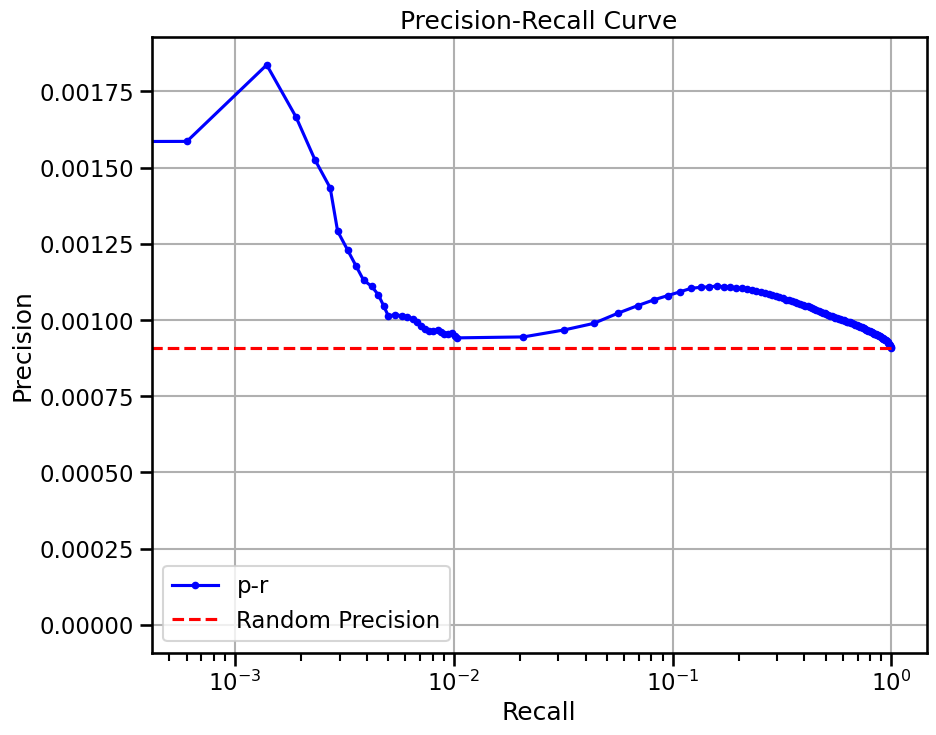


  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:01<00:03,  1.66s/it]


 67%|██████▋   | 2/3 [00:01<00:00,  1.16it/s]


100%|██████████| 3/3 [00:02<00:00,  1.65it/s]


100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

base enrichment


Top central genes: []


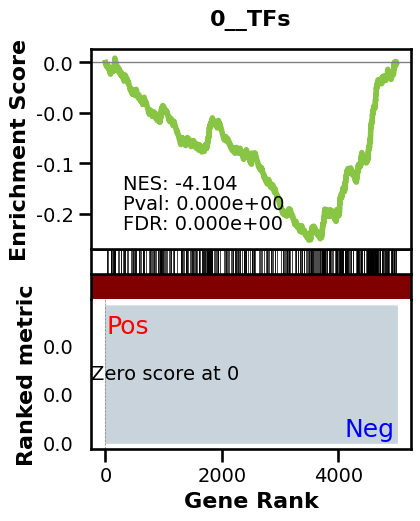

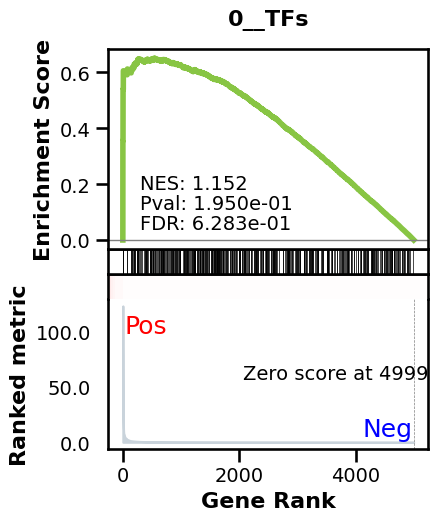

_________________________________________
TF specific enrichment


found some significant results for  23.80952380952381 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.85it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.81it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.81it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.81it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.80it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.77it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.60it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.63it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.68it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.74it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.78it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.79it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.76it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.79it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.76it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.64it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.57it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.60it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.68it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.61it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.55it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.59it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015036508100744537
EPR: 0.5691599735043364


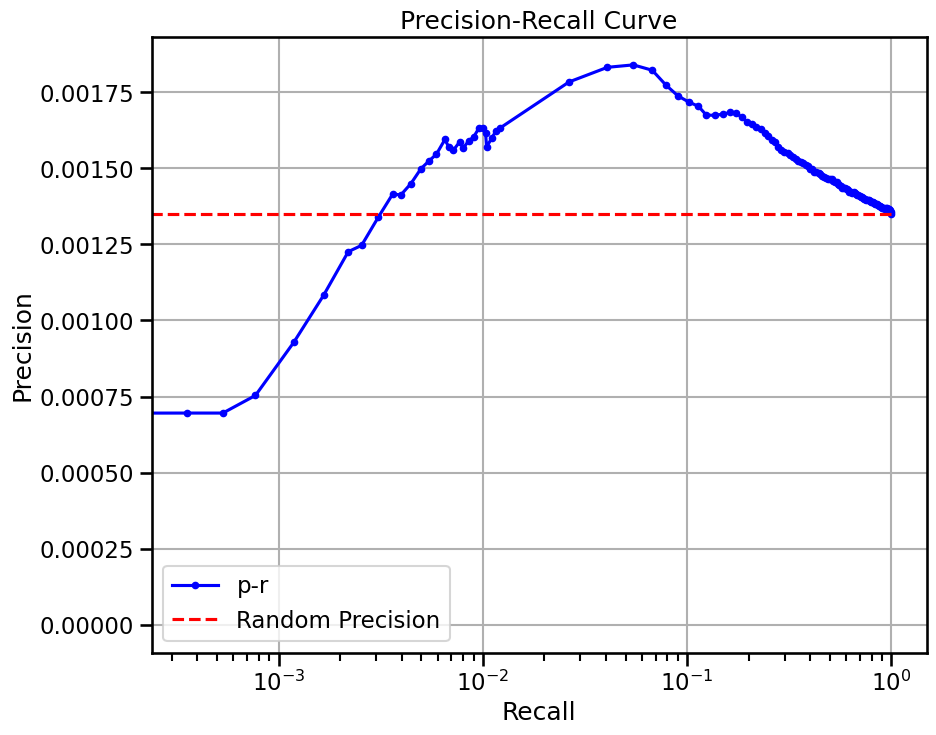

base enrichment


Top central genes: []


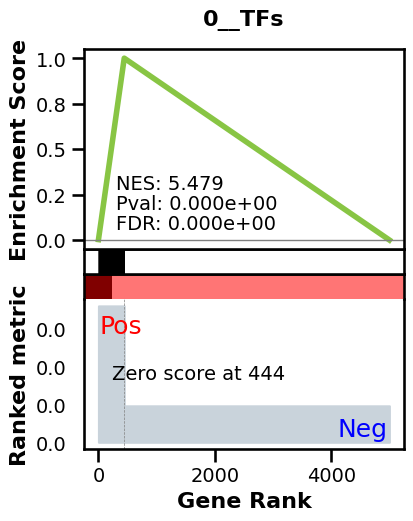

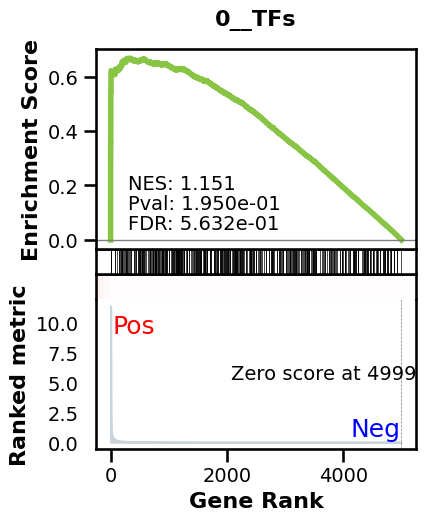

_________________________________________
TF specific enrichment


found some significant results for  2.380952380952381 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.006564024211083035 
recall:  0.5291644460235684 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.62it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.75it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.72it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.78it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.31it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.50it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.66it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.81it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.80it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.90it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.91it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.00it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.82it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.95it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.87it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.95it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.10it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.10it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.10it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.10it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.04it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.85it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004734022317301531
EPR: 5.681262574832415


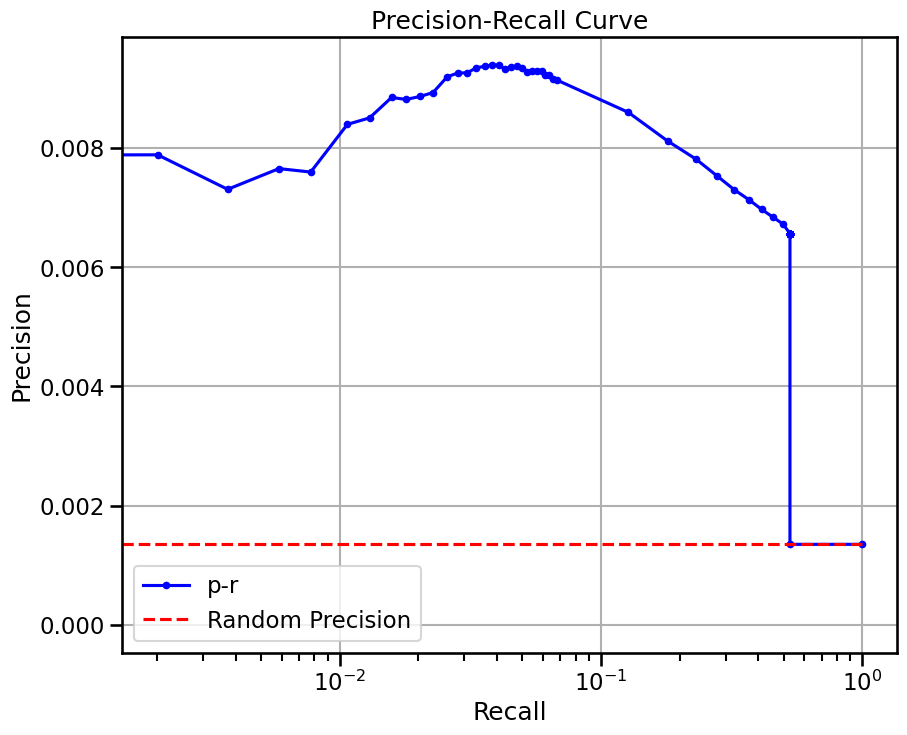

base enrichment


Top central genes: []


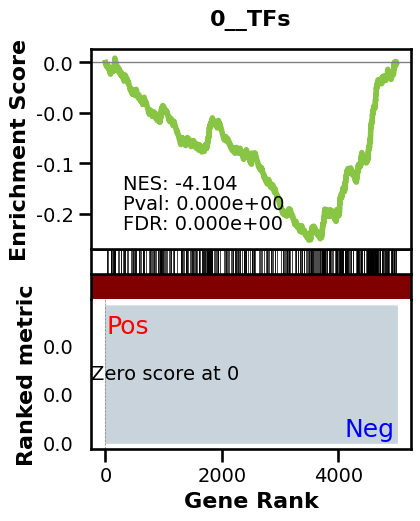

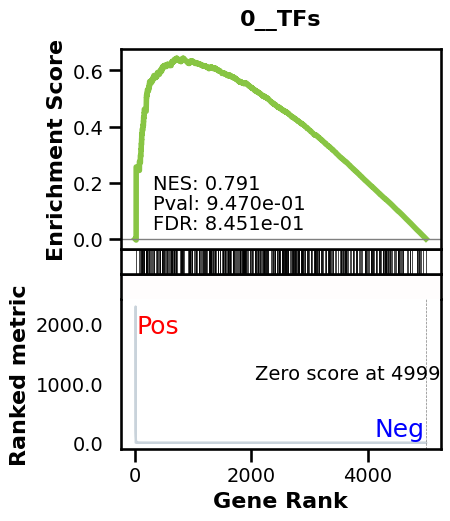

_________________________________________
TF specific enrichment


found some significant results for  26.19047619047619 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.49it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.26it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.29it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.28it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.34it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.41it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.46it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.25it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.35it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.46it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.50it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.41it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.39it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.40it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.50it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.55it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.58it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.56it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.56it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.10it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.29it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0024609050656063678
EPR: 1.1400771247805712


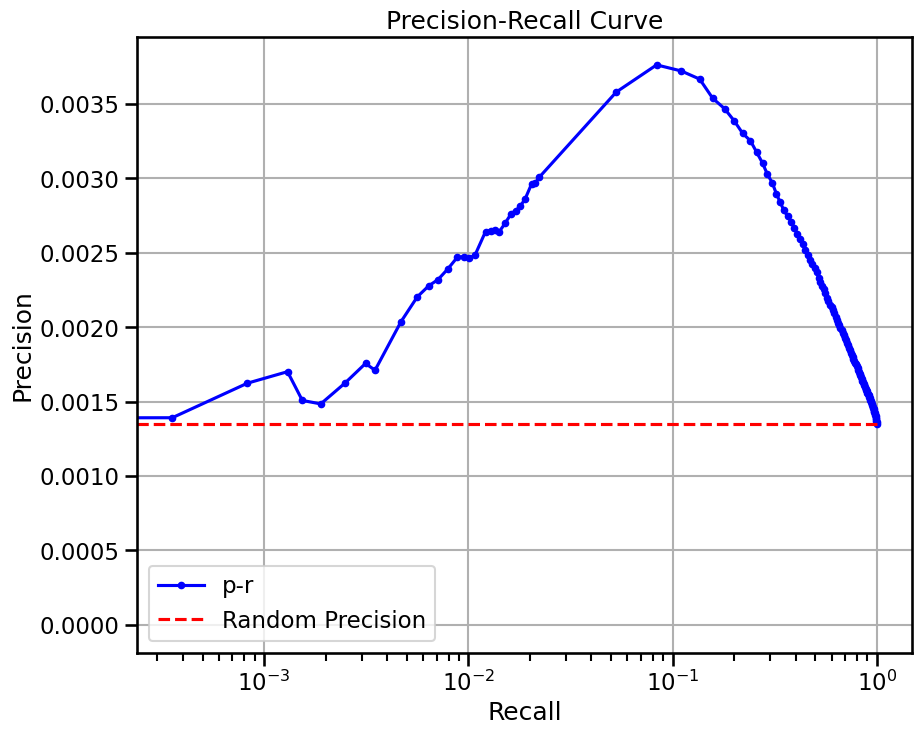

base enrichment


Top central genes: []


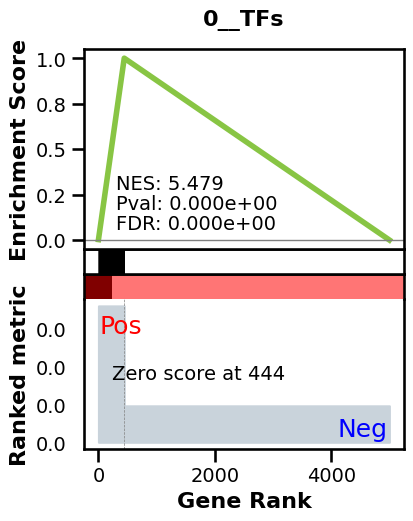

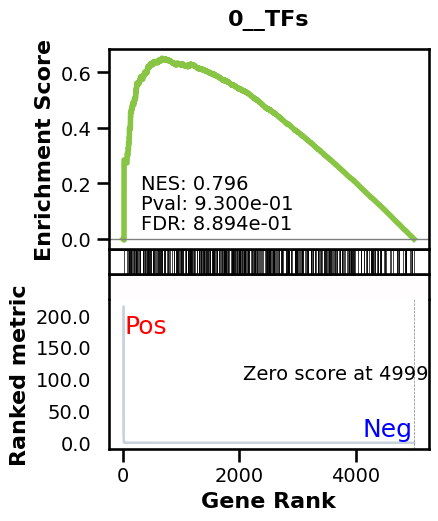

_________________________________________
TF specific enrichment


found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.006564024211083035 
recall:  0.5291644460235684 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.35it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.66it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.36it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.21it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.25it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.24it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.19it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.91it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.05it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.98it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.99it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.89it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.90it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.88it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.84it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.88it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.06it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.07it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.93it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.10it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.09it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.03it/s]

Area Under Precision-Recall Curve (AUPRC):  0.009007065616556295
EPR: 17.57702771740212


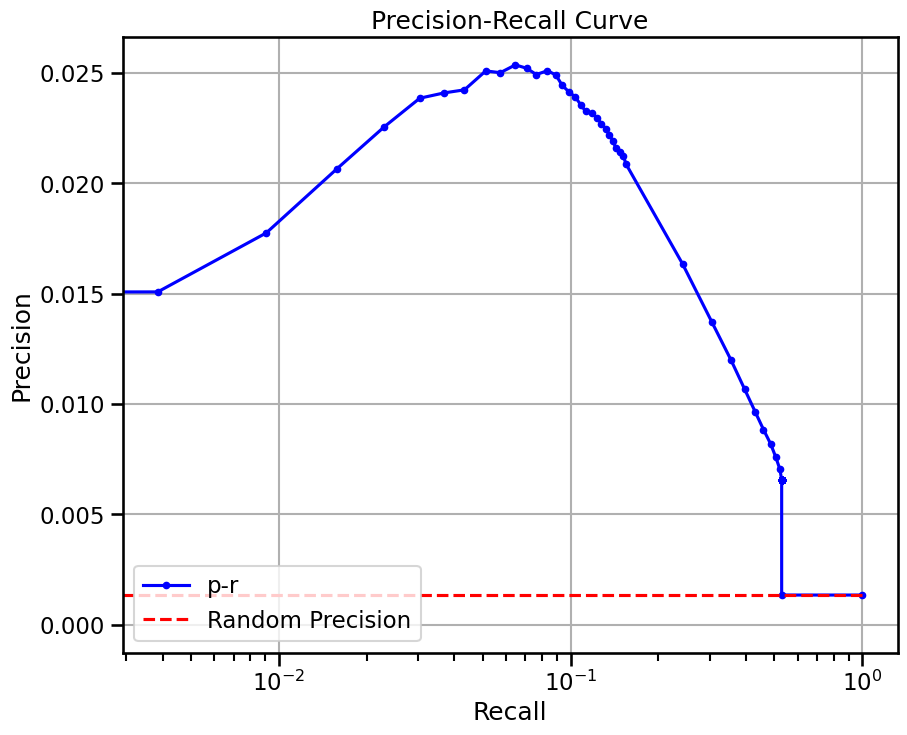


  0%|          | 0/6 [00:00<?, ?it/s]


 17%|█▋        | 1/6 [00:01<00:08,  1.74s/it]


 33%|███▎      | 2/6 [00:01<00:03,  1.17it/s]


 50%|█████     | 3/6 [00:05<00:06,  2.09s/it]


 67%|██████▋   | 4/6 [00:05<00:02,  1.36s/it]


 83%|████████▎ | 5/6 [00:06<00:00,  1.05it/s]


100%|██████████| 6/6 [00:06<00:00,  1.33it/s]


100%|██████████| 6/6 [00:06<00:00,  1.10s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


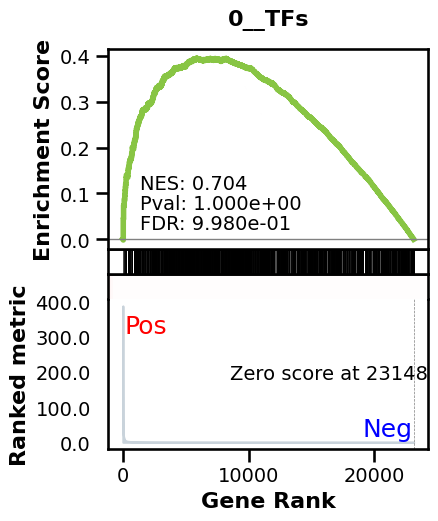

_________________________________________
TF specific enrichment


found some significant results for  68.75 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:33,  3.79it/s]


  2%|▏         | 2/128 [00:00<00:33,  3.77it/s]


  2%|▏         | 3/128 [00:00<00:33,  3.78it/s]


  3%|▎         | 4/128 [00:01<00:32,  3.78it/s]


  4%|▍         | 5/128 [00:01<00:32,  3.78it/s]


  5%|▍         | 6/128 [00:01<00:32,  3.78it/s]


  5%|▌         | 7/128 [00:01<00:31,  3.79it/s]


  6%|▋         | 8/128 [00:02<00:31,  3.80it/s]


  7%|▋         | 9/128 [00:02<00:31,  3.80it/s]


  8%|▊         | 10/128 [00:02<00:31,  3.80it/s]


  9%|▊         | 11/128 [00:02<00:30,  3.80it/s]


  9%|▉         | 12/128 [00:03<00:30,  3.79it/s]


 10%|█         | 13/128 [00:03<00:30,  3.79it/s]


 11%|█         | 14/128 [00:03<00:30,  3.79it/s]


 12%|█▏        | 15/128 [00:03<00:29,  3.79it/s]


 12%|█▎        | 16/128 [00:04<00:29,  3.80it/s]


 13%|█▎        | 17/128 [00:04<00:29,  3.80it/s]


 14%|█▍        | 18/128 [00:04<00:28,  3.80it/s]


 15%|█▍        | 19/128 [00:05<00:28,  3.80it/s]


 16%|█▌        | 20/128 [00:05<00:28,  3.80it/s]


 16%|█▋        | 21/128 [00:05<00:28,  3.80it/s]


 17%|█▋        | 22/128 [00:05<00:27,  3.81it/s]


 18%|█▊        | 23/128 [00:06<00:27,  3.81it/s]


 19%|█▉        | 24/128 [00:06<00:27,  3.81it/s]


 20%|█▉        | 25/128 [00:06<00:27,  3.80it/s]


 20%|██        | 26/128 [00:06<00:26,  3.79it/s]


 21%|██        | 27/128 [00:07<00:26,  3.79it/s]


 22%|██▏       | 28/128 [00:07<00:26,  3.79it/s]


 23%|██▎       | 29/128 [00:07<00:26,  3.79it/s]


 23%|██▎       | 30/128 [00:07<00:25,  3.78it/s]


 24%|██▍       | 31/128 [00:08<00:25,  3.79it/s]


 25%|██▌       | 32/128 [00:08<00:25,  3.79it/s]


 26%|██▌       | 33/128 [00:08<00:25,  3.79it/s]


 27%|██▋       | 34/128 [00:08<00:24,  3.79it/s]


 27%|██▋       | 35/128 [00:09<00:24,  3.79it/s]


 28%|██▊       | 36/128 [00:09<00:24,  3.79it/s]


 29%|██▉       | 37/128 [00:09<00:23,  3.79it/s]


 30%|██▉       | 38/128 [00:10<00:23,  3.79it/s]


 30%|███       | 39/128 [00:10<00:23,  3.79it/s]


 31%|███▏      | 40/128 [00:10<00:23,  3.78it/s]


 32%|███▏      | 41/128 [00:10<00:22,  3.79it/s]


 33%|███▎      | 42/128 [00:11<00:22,  3.79it/s]


 34%|███▎      | 43/128 [00:11<00:22,  3.80it/s]


 34%|███▍      | 44/128 [00:11<00:22,  3.80it/s]


 35%|███▌      | 45/128 [00:11<00:21,  3.80it/s]


 36%|███▌      | 46/128 [00:12<00:21,  3.79it/s]


 37%|███▋      | 47/128 [00:12<00:23,  3.42it/s]


 38%|███▊      | 48/128 [00:12<00:22,  3.58it/s]


 38%|███▊      | 49/128 [00:12<00:21,  3.70it/s]


 39%|███▉      | 50/128 [00:13<00:20,  3.79it/s]


 40%|███▉      | 51/128 [00:13<00:19,  3.86it/s]


 41%|████      | 52/128 [00:13<00:19,  3.91it/s]


 41%|████▏     | 53/128 [00:13<00:18,  3.95it/s]


 42%|████▏     | 54/128 [00:14<00:21,  3.44it/s]


 43%|████▎     | 55/128 [00:14<00:19,  3.67it/s]


 44%|████▍     | 56/128 [00:14<00:18,  3.85it/s]


 45%|████▍     | 57/128 [00:15<00:17,  3.99it/s]


 45%|████▌     | 58/128 [00:15<00:17,  4.10it/s]


 46%|████▌     | 59/128 [00:15<00:16,  4.18it/s]


 47%|████▋     | 60/128 [00:15<00:16,  4.24it/s]


 48%|████▊     | 61/128 [00:15<00:15,  4.28it/s]


 48%|████▊     | 62/128 [00:16<00:15,  4.30it/s]


 49%|████▉     | 63/128 [00:16<00:15,  4.33it/s]


 50%|█████     | 64/128 [00:16<00:14,  4.34it/s]


 51%|█████     | 65/128 [00:16<00:14,  4.35it/s]


 52%|█████▏    | 66/128 [00:17<00:14,  4.35it/s]


 52%|█████▏    | 67/128 [00:17<00:14,  4.35it/s]


 53%|█████▎    | 68/128 [00:17<00:13,  4.36it/s]


 54%|█████▍    | 69/128 [00:17<00:15,  3.91it/s]


 55%|█████▍    | 70/128 [00:18<00:16,  3.58it/s]


 55%|█████▌    | 71/128 [00:18<00:15,  3.79it/s]


 56%|█████▋    | 72/128 [00:18<00:14,  3.95it/s]


 57%|█████▋    | 73/128 [00:18<00:13,  4.07it/s]


 58%|█████▊    | 74/128 [00:19<00:12,  4.16it/s]


 59%|█████▊    | 75/128 [00:19<00:12,  4.24it/s]


 59%|█████▉    | 76/128 [00:19<00:12,  4.28it/s]


 60%|██████    | 77/128 [00:19<00:12,  3.94it/s]


 61%|██████    | 78/128 [00:20<00:12,  4.07it/s]


 62%|██████▏   | 79/128 [00:20<00:11,  4.17it/s]


 62%|██████▎   | 80/128 [00:20<00:11,  4.23it/s]


 63%|██████▎   | 81/128 [00:20<00:10,  4.28it/s]


 64%|██████▍   | 82/128 [00:21<00:10,  4.33it/s]


 65%|██████▍   | 83/128 [00:21<00:10,  4.35it/s]


 66%|██████▌   | 84/128 [00:21<00:10,  4.36it/s]


 66%|██████▋   | 85/128 [00:21<00:09,  4.37it/s]


 67%|██████▋   | 86/128 [00:21<00:09,  4.39it/s]


 68%|██████▊   | 87/128 [00:22<00:09,  4.40it/s]


 69%|██████▉   | 88/128 [00:22<00:09,  4.41it/s]


 70%|██████▉   | 89/128 [00:22<00:08,  4.41it/s]


 70%|███████   | 90/128 [00:22<00:08,  4.40it/s]


 71%|███████   | 91/128 [00:23<00:08,  4.40it/s]


 72%|███████▏  | 92/128 [00:23<00:08,  4.41it/s]


 73%|███████▎  | 93/128 [00:23<00:07,  4.41it/s]


 73%|███████▎  | 94/128 [00:23<00:07,  4.40it/s]


 74%|███████▍  | 95/128 [00:23<00:07,  4.40it/s]


 75%|███████▌  | 96/128 [00:24<00:07,  4.40it/s]


 76%|███████▌  | 97/128 [00:24<00:07,  4.41it/s]


 77%|███████▋  | 98/128 [00:24<00:06,  4.41it/s]


 77%|███████▋  | 99/128 [00:24<00:06,  4.40it/s]


 78%|███████▊  | 100/128 [00:25<00:06,  4.39it/s]


 79%|███████▉  | 101/128 [00:25<00:06,  4.39it/s]


 80%|███████▉  | 102/128 [00:25<00:05,  4.39it/s]


 80%|████████  | 103/128 [00:25<00:05,  4.40it/s]


 81%|████████▏ | 104/128 [00:26<00:05,  4.40it/s]


 82%|████████▏ | 105/128 [00:26<00:05,  4.41it/s]


 83%|████████▎ | 106/128 [00:26<00:05,  4.40it/s]


 84%|████████▎ | 107/128 [00:26<00:04,  4.40it/s]


 84%|████████▍ | 108/128 [00:26<00:04,  4.40it/s]


 85%|████████▌ | 109/128 [00:27<00:04,  4.40it/s]


 86%|████████▌ | 110/128 [00:27<00:04,  4.41it/s]


 87%|████████▋ | 111/128 [00:27<00:03,  4.41it/s]


 88%|████████▊ | 112/128 [00:27<00:03,  4.42it/s]


 88%|████████▊ | 113/128 [00:28<00:03,  4.42it/s]


 89%|████████▉ | 114/128 [00:28<00:03,  4.40it/s]


 90%|████████▉ | 115/128 [00:28<00:02,  4.41it/s]


 91%|█████████ | 116/128 [00:28<00:02,  4.40it/s]


 91%|█████████▏| 117/128 [00:28<00:02,  4.41it/s]


 92%|█████████▏| 118/128 [00:29<00:02,  4.41it/s]


 93%|█████████▎| 119/128 [00:29<00:02,  4.41it/s]


 94%|█████████▍| 120/128 [00:29<00:01,  4.41it/s]


 95%|█████████▍| 121/128 [00:29<00:01,  4.39it/s]


 95%|█████████▌| 122/128 [00:30<00:01,  4.40it/s]


 96%|█████████▌| 123/128 [00:30<00:01,  4.40it/s]


 97%|█████████▋| 124/128 [00:30<00:00,  4.41it/s]


 98%|█████████▊| 125/128 [00:30<00:00,  4.42it/s]


 98%|█████████▊| 126/128 [00:31<00:00,  4.41it/s]


 99%|█████████▉| 127/128 [00:31<00:00,  4.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:31<00:00,  4.40it/s]


100%|██████████| 128/128 [00:31<00:00,  4.07it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010836716745660805


EPR: 2.7531992882751757


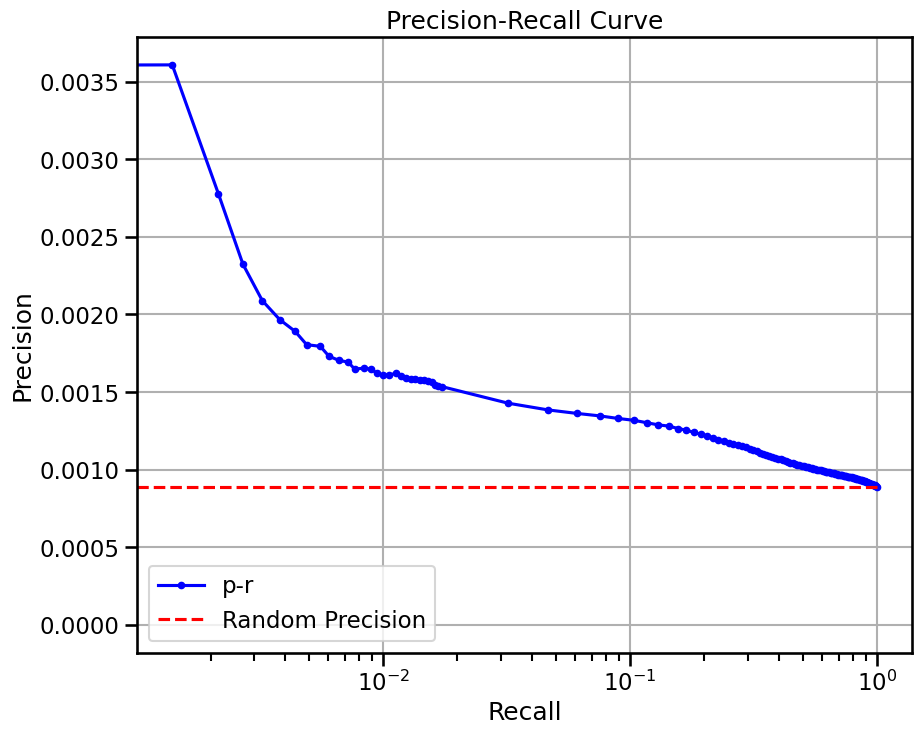


  0%|          | 0/12 [00:00<?, ?it/s]


  8%|▊         | 1/12 [00:01<00:15,  1.45s/it]


 17%|█▋        | 2/12 [00:01<00:07,  1.32it/s]


 25%|██▌       | 3/12 [00:01<00:04,  1.88it/s]


 33%|███▎      | 4/12 [00:02<00:03,  2.35it/s]


 42%|████▏     | 5/12 [00:02<00:02,  2.74it/s]


 50%|█████     | 6/12 [00:02<00:01,  3.01it/s]


 58%|█████▊    | 7/12 [00:03<00:01,  3.24it/s]


 67%|██████▋   | 8/12 [00:03<00:01,  2.95it/s]


 75%|███████▌  | 9/12 [00:03<00:00,  3.07it/s]


 83%|████████▎ | 10/12 [00:04<00:00,  3.15it/s]


 92%|█████████▏| 11/12 [00:04<00:00,  3.22it/s]


100%|██████████| 12/12 [00:04<00:00,  3.77it/s]


100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

base enrichment


Top central genes: []


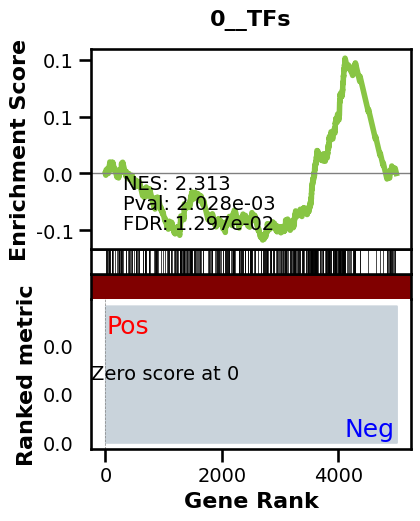

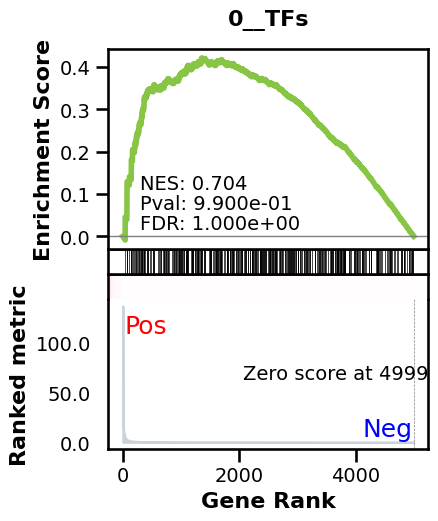

_________________________________________
TF specific enrichment


found some significant results for  20.37037037037037 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 69.00it/s]


 11%|█         | 14/128 [00:00<00:01, 68.60it/s]


 16%|█▋        | 21/128 [00:00<00:01, 68.84it/s]


 22%|██▏       | 28/128 [00:00<00:01, 68.90it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.85it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.79it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.89it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.94it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.94it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.95it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.96it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 69.02it/s]


 71%|███████   | 91/128 [00:01<00:00, 69.01it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.93it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.88it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.87it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.73it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.65it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.77it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016548166853695566
EPR: 1.043394828548237


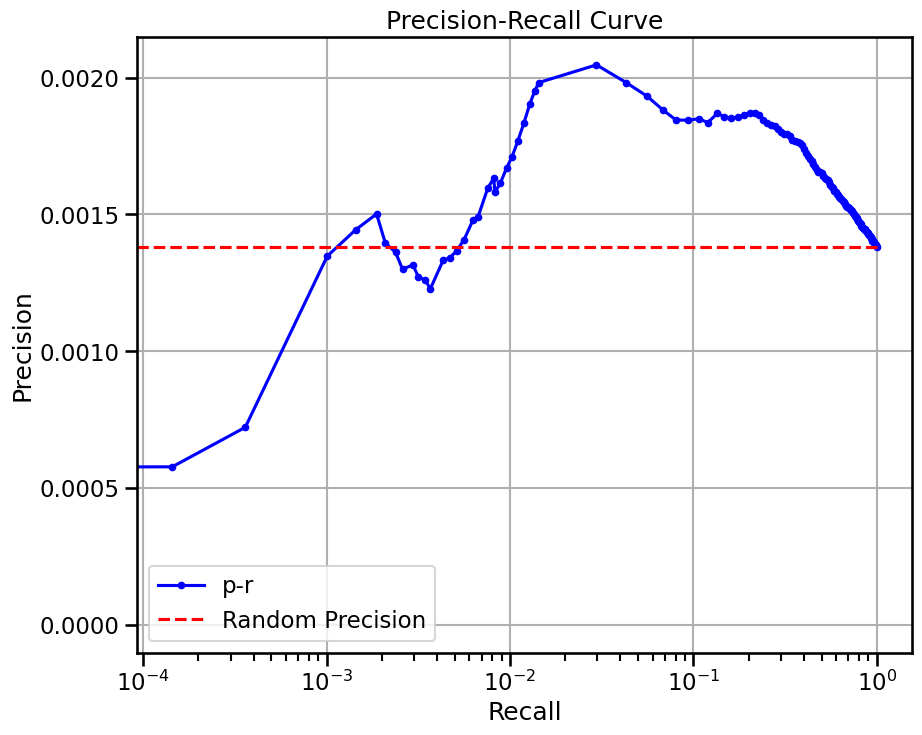

base enrichment


Top central genes: []


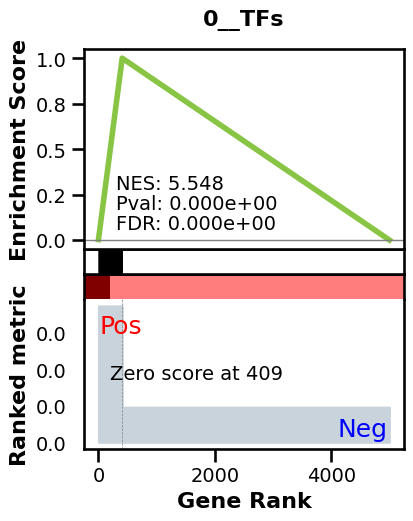

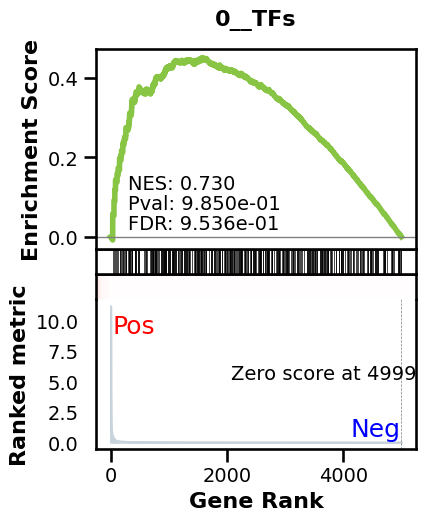

_________________________________________
TF specific enrichment


found some significant results for  11.11111111111111 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.006449082630843438 
recall:  0.5156058530959418 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 69.51it/s]


 11%|█         | 14/128 [00:00<00:01, 69.49it/s]


 16%|█▋        | 21/128 [00:00<00:01, 69.52it/s]


 22%|██▏       | 28/128 [00:00<00:01, 69.30it/s]


 27%|██▋       | 35/128 [00:00<00:01, 69.37it/s]


 33%|███▎      | 42/128 [00:00<00:01, 69.40it/s]


 38%|███▊      | 49/128 [00:00<00:01, 69.43it/s]


 44%|████▍     | 56/128 [00:00<00:01, 69.30it/s]


 49%|████▉     | 63/128 [00:00<00:00, 69.30it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.94it/s]


 60%|██████    | 77/128 [00:01<00:00, 69.07it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 69.11it/s]


 71%|███████   | 91/128 [00:01<00:00, 69.20it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 69.29it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 69.34it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 69.35it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 69.32it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 69.15it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 69.20it/s]

Area Under Precision-Recall Curve (AUPRC):  0.004906081265440316
EPR: 7.2696153285653855


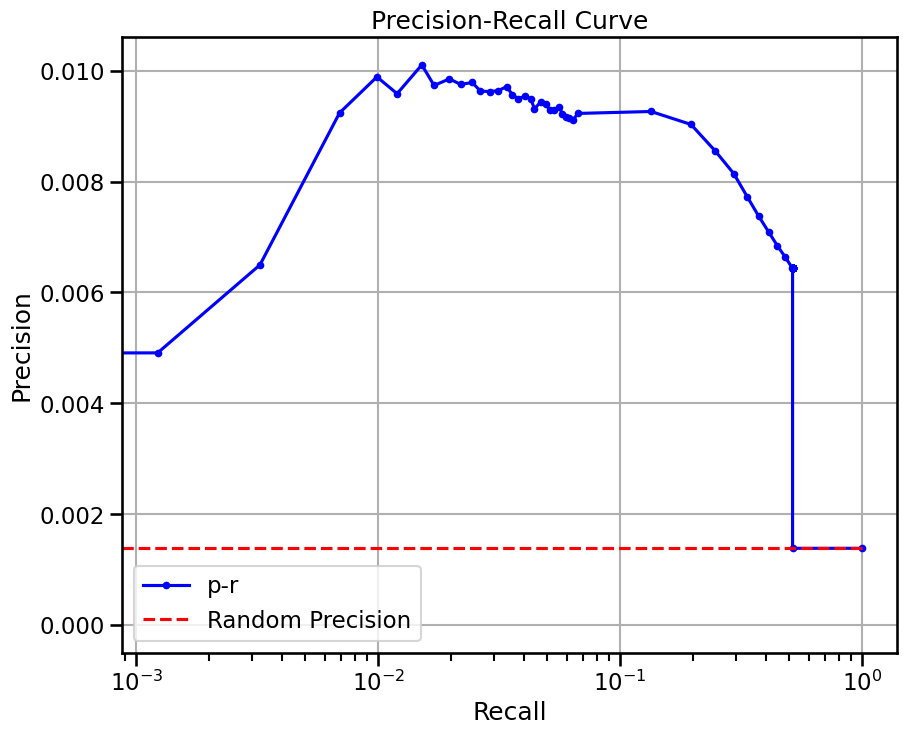

base enrichment


Top central genes: []


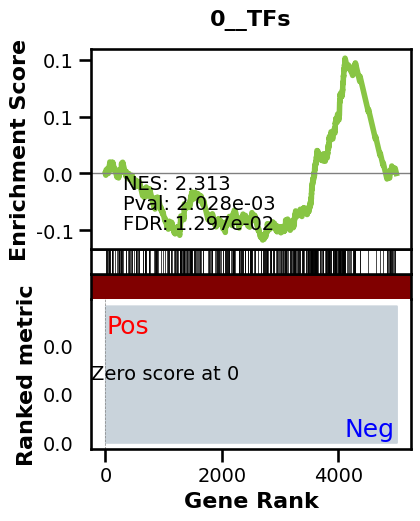

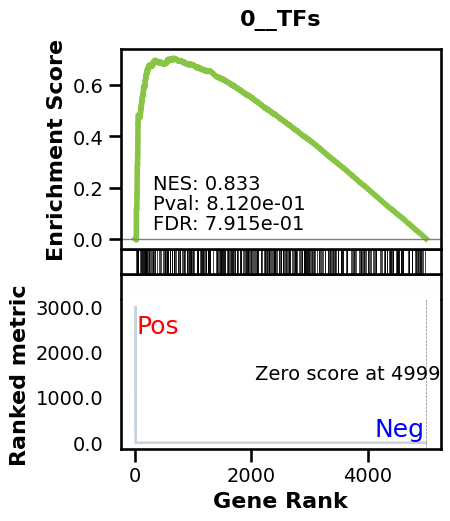

_________________________________________
TF specific enrichment


found some significant results for  12.962962962962964 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.67it/s]


 11%|█         | 14/128 [00:00<00:01, 69.00it/s]


 16%|█▋        | 21/128 [00:00<00:01, 69.23it/s]


 22%|██▏       | 28/128 [00:00<00:01, 69.08it/s]


 27%|██▋       | 35/128 [00:00<00:01, 69.17it/s]


 33%|███▎      | 42/128 [00:00<00:01, 69.16it/s]


 38%|███▊      | 49/128 [00:00<00:01, 69.18it/s]


 44%|████▍     | 56/128 [00:00<00:01, 69.17it/s]


 49%|████▉     | 63/128 [00:00<00:00, 69.16it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 69.00it/s]


 60%|██████    | 77/128 [00:01<00:00, 69.04it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 69.10it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.98it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 69.06it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.95it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.67it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.85it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.85it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.96it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0036103628863009066
EPR: 3.2012885908063846


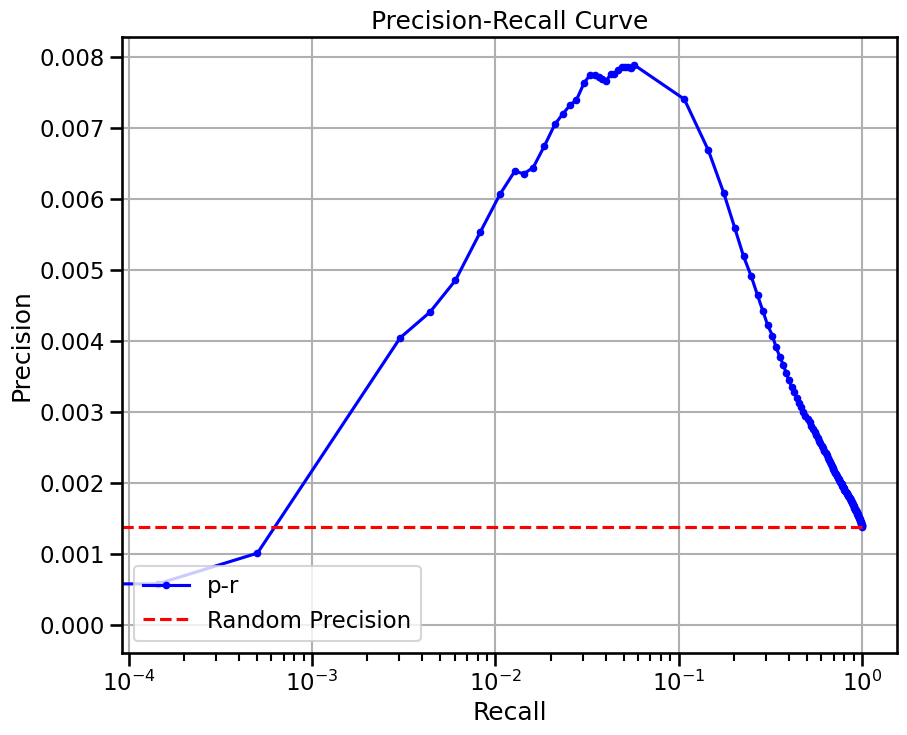

base enrichment


Top central genes: []


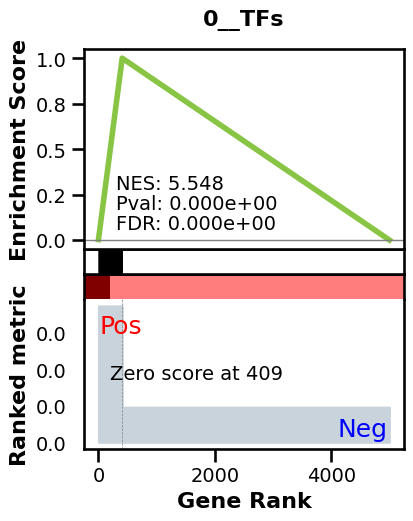

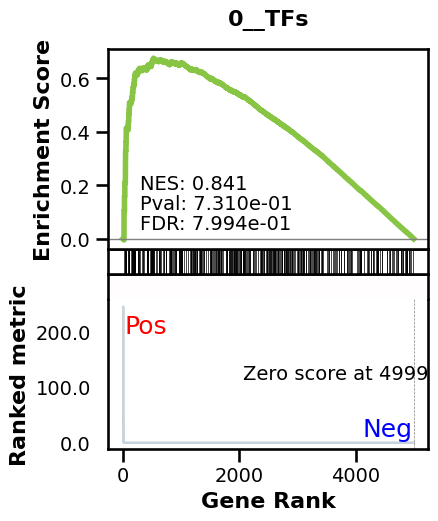

_________________________________________
TF specific enrichment


found some significant results for  5.555555555555555 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.006449082630843438 
recall:  0.5156058530959418 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.61it/s]


 11%|█         | 14/128 [00:00<00:01, 68.65it/s]


 16%|█▋        | 21/128 [00:00<00:01, 68.84it/s]


 22%|██▏       | 28/128 [00:00<00:01, 68.95it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.95it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.90it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.76it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.76it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.89it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.85it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.83it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 68.75it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.86it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.81it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.83it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.91it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.92it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.93it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.78it/s]

Area Under Precision-Recall Curve (AUPRC):  0.01215409692848057
EPR: 36.65560021010039


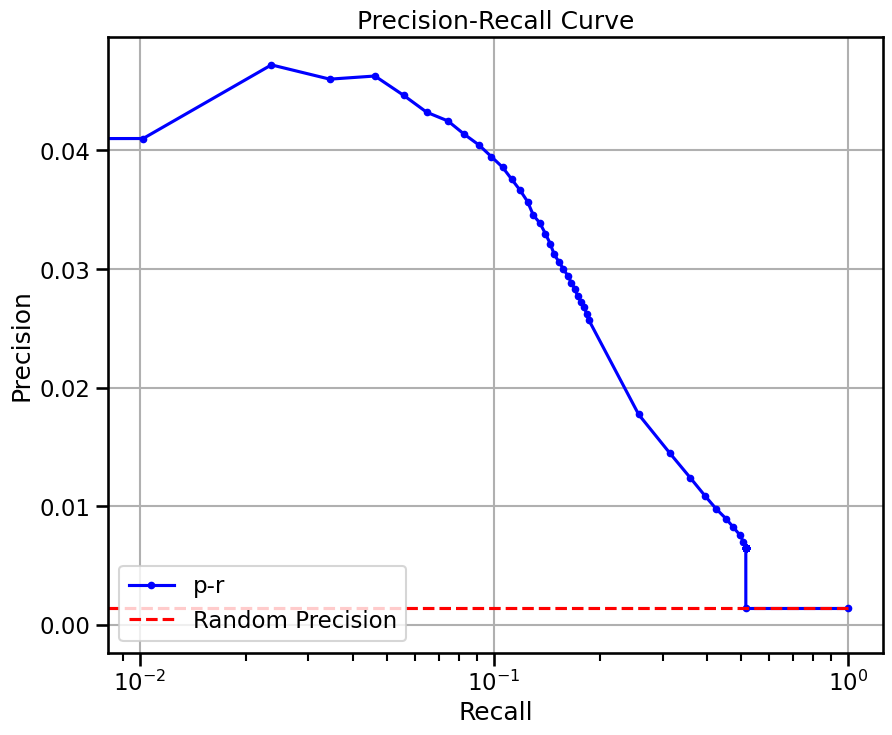


  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [00:01<00:51,  1.67s/it]


  6%|▋         | 2/32 [00:01<00:25,  1.19it/s]


  9%|▉         | 3/32 [00:02<00:16,  1.74it/s]


 12%|█▎        | 4/32 [00:02<00:12,  2.21it/s]


 16%|█▌        | 5/32 [00:02<00:11,  2.33it/s]


 19%|█▉        | 6/32 [00:03<00:11,  2.20it/s]


 22%|██▏       | 7/32 [00:03<00:09,  2.54it/s]


 25%|██▌       | 8/32 [00:03<00:08,  2.83it/s]


 28%|██▊       | 9/32 [00:04<00:07,  3.09it/s]


 31%|███▏      | 10/32 [00:04<00:06,  3.29it/s]


 34%|███▍      | 11/32 [00:04<00:06,  3.45it/s]


 38%|███▊      | 12/32 [00:04<00:05,  3.53it/s]


 41%|████      | 13/32 [00:05<00:05,  3.61it/s]


 44%|████▍     | 14/32 [00:05<00:04,  3.67it/s]


 47%|████▋     | 15/32 [00:05<00:04,  3.71it/s]


 50%|█████     | 16/32 [00:05<00:04,  3.75it/s]


 53%|█████▎    | 17/32 [00:06<00:03,  3.78it/s]


 56%|█████▋    | 18/32 [00:06<00:03,  3.80it/s]


 59%|█████▉    | 19/32 [00:06<00:03,  3.81it/s]


 62%|██████▎   | 20/32 [00:07<00:03,  3.81it/s]


 66%|██████▌   | 21/32 [00:07<00:02,  3.81it/s]


 69%|██████▉   | 22/32 [00:07<00:02,  3.82it/s]


 72%|███████▏  | 23/32 [00:07<00:02,  3.83it/s]


 75%|███████▌  | 24/32 [00:08<00:02,  3.82it/s]


 78%|███████▊  | 25/32 [00:08<00:01,  3.82it/s]


 81%|████████▏ | 26/32 [00:10<00:04,  1.30it/s]


 84%|████████▍ | 27/32 [00:12<00:06,  1.21s/it]


 88%|████████▊ | 28/32 [00:12<00:03,  1.08it/s]


 91%|█████████ | 29/32 [00:14<00:03,  1.24s/it]


 94%|█████████▍| 30/32 [00:15<00:01,  1.05it/s]


 97%|█████████▋| 31/32 [00:15<00:00,  1.35it/s]


100%|██████████| 32/32 [00:15<00:00,  1.67it/s]


100%|██████████| 32/32 [00:15<00:00,  2.03it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


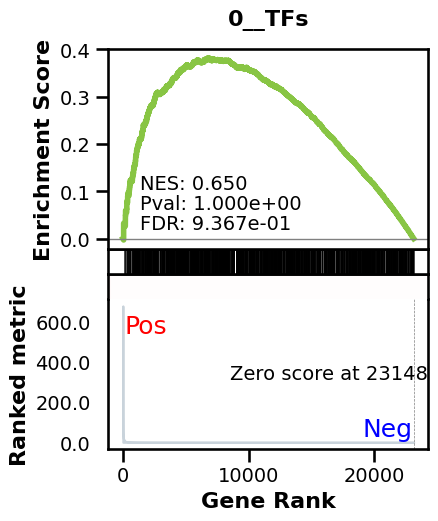

_________________________________________
TF specific enrichment


found some significant results for  72.32142857142857 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:30,  4.11it/s]


  2%|▏         | 2/128 [00:00<00:30,  4.10it/s]


  2%|▏         | 3/128 [00:00<00:30,  4.10it/s]


  3%|▎         | 4/128 [00:00<00:30,  4.09it/s]


  4%|▍         | 5/128 [00:01<00:30,  4.08it/s]


  5%|▍         | 6/128 [00:01<00:29,  4.08it/s]


  5%|▌         | 7/128 [00:01<00:29,  4.09it/s]


  6%|▋         | 8/128 [00:01<00:29,  4.08it/s]


  7%|▋         | 9/128 [00:02<00:29,  4.06it/s]


  8%|▊         | 10/128 [00:02<00:28,  4.07it/s]


  9%|▊         | 11/128 [00:02<00:28,  4.08it/s]


  9%|▉         | 12/128 [00:02<00:28,  4.08it/s]


 10%|█         | 13/128 [00:03<00:28,  4.08it/s]


 11%|█         | 14/128 [00:03<00:27,  4.08it/s]


 12%|█▏        | 15/128 [00:03<00:27,  4.08it/s]


 12%|█▎        | 16/128 [00:03<00:27,  4.09it/s]


 13%|█▎        | 17/128 [00:04<00:27,  4.09it/s]


 14%|█▍        | 18/128 [00:04<00:26,  4.10it/s]


 15%|█▍        | 19/128 [00:04<00:26,  4.09it/s]


 16%|█▌        | 20/128 [00:04<00:26,  4.09it/s]


 16%|█▋        | 21/128 [00:05<00:26,  4.08it/s]


 17%|█▋        | 22/128 [00:05<00:26,  4.07it/s]


 18%|█▊        | 23/128 [00:05<00:25,  4.07it/s]


 19%|█▉        | 24/128 [00:05<00:25,  4.09it/s]


 20%|█▉        | 25/128 [00:06<00:25,  4.10it/s]


 20%|██        | 26/128 [00:06<00:24,  4.10it/s]


 21%|██        | 27/128 [00:06<00:24,  4.09it/s]


 22%|██▏       | 28/128 [00:06<00:24,  4.09it/s]


 23%|██▎       | 29/128 [00:07<00:24,  4.09it/s]


 23%|██▎       | 30/128 [00:07<00:23,  4.09it/s]


 24%|██▍       | 31/128 [00:07<00:23,  4.10it/s]


 25%|██▌       | 32/128 [00:07<00:23,  4.09it/s]


 26%|██▌       | 33/128 [00:08<00:23,  4.08it/s]


 27%|██▋       | 34/128 [00:08<00:22,  4.10it/s]


 27%|██▋       | 35/128 [00:08<00:22,  4.10it/s]


 28%|██▊       | 36/128 [00:08<00:22,  4.09it/s]


 29%|██▉       | 37/128 [00:09<00:22,  4.09it/s]


 30%|██▉       | 38/128 [00:09<00:21,  4.10it/s]


 30%|███       | 39/128 [00:09<00:21,  4.11it/s]


 31%|███▏      | 40/128 [00:09<00:21,  4.11it/s]


 32%|███▏      | 41/128 [00:10<00:21,  4.10it/s]


 33%|███▎      | 42/128 [00:10<00:20,  4.10it/s]


 34%|███▎      | 43/128 [00:10<00:20,  4.10it/s]


 34%|███▍      | 44/128 [00:10<00:20,  4.10it/s]


 35%|███▌      | 45/128 [00:11<00:20,  4.10it/s]


 36%|███▌      | 46/128 [00:11<00:20,  4.08it/s]


 37%|███▋      | 47/128 [00:11<00:19,  4.09it/s]


 38%|███▊      | 48/128 [00:11<00:19,  4.09it/s]


 38%|███▊      | 49/128 [00:11<00:19,  4.08it/s]


 39%|███▉      | 50/128 [00:12<00:19,  4.08it/s]


 40%|███▉      | 51/128 [00:12<00:18,  4.08it/s]


 41%|████      | 52/128 [00:12<00:18,  4.08it/s]


 41%|████▏     | 53/128 [00:12<00:18,  4.08it/s]


 42%|████▏     | 54/128 [00:13<00:18,  4.08it/s]


 43%|████▎     | 55/128 [00:13<00:17,  4.07it/s]


 44%|████▍     | 56/128 [00:13<00:17,  4.08it/s]


 45%|████▍     | 57/128 [00:13<00:17,  4.07it/s]


 45%|████▌     | 58/128 [00:14<00:17,  4.08it/s]


 46%|████▌     | 59/128 [00:14<00:16,  4.09it/s]


 47%|████▋     | 60/128 [00:14<00:16,  4.09it/s]


 48%|████▊     | 61/128 [00:14<00:16,  4.10it/s]


 48%|████▊     | 62/128 [00:15<00:16,  4.10it/s]


 49%|████▉     | 63/128 [00:15<00:15,  4.10it/s]


 50%|█████     | 64/128 [00:15<00:15,  4.10it/s]


 51%|█████     | 65/128 [00:15<00:15,  4.10it/s]


 52%|█████▏    | 66/128 [00:16<00:15,  4.10it/s]


 52%|█████▏    | 67/128 [00:16<00:14,  4.10it/s]


 53%|█████▎    | 68/128 [00:16<00:14,  4.10it/s]


 54%|█████▍    | 69/128 [00:16<00:14,  4.11it/s]


 55%|█████▍    | 70/128 [00:17<00:14,  4.10it/s]


 55%|█████▌    | 71/128 [00:17<00:13,  4.10it/s]


 56%|█████▋    | 72/128 [00:17<00:13,  4.10it/s]


 57%|█████▋    | 73/128 [00:17<00:13,  4.08it/s]


 58%|█████▊    | 74/128 [00:18<00:13,  4.09it/s]


 59%|█████▊    | 75/128 [00:18<00:12,  4.08it/s]


 59%|█████▉    | 76/128 [00:18<00:12,  4.09it/s]


 60%|██████    | 77/128 [00:18<00:12,  4.09it/s]


 61%|██████    | 78/128 [00:19<00:12,  4.08it/s]


 62%|██████▏   | 79/128 [00:19<00:11,  4.10it/s]


 62%|██████▎   | 80/128 [00:19<00:11,  4.10it/s]


 63%|██████▎   | 81/128 [00:19<00:11,  4.11it/s]


 64%|██████▍   | 82/128 [00:20<00:11,  4.11it/s]


 65%|██████▍   | 83/128 [00:20<00:11,  4.09it/s]


 66%|██████▌   | 84/128 [00:20<00:10,  4.09it/s]


 66%|██████▋   | 85/128 [00:20<00:10,  4.06it/s]


 67%|██████▋   | 86/128 [00:21<00:10,  4.08it/s]


 68%|██████▊   | 87/128 [00:21<00:10,  4.08it/s]


 69%|██████▉   | 88/128 [00:21<00:09,  4.09it/s]


 70%|██████▉   | 89/128 [00:21<00:09,  4.10it/s]


 70%|███████   | 90/128 [00:22<00:09,  4.09it/s]


 71%|███████   | 91/128 [00:22<00:09,  4.10it/s]


 72%|███████▏  | 92/128 [00:22<00:08,  4.11it/s]


 73%|███████▎  | 93/128 [00:22<00:08,  4.11it/s]


 73%|███████▎  | 94/128 [00:22<00:08,  4.10it/s]


 74%|███████▍  | 95/128 [00:23<00:08,  4.09it/s]


 75%|███████▌  | 96/128 [00:23<00:07,  4.09it/s]


 76%|███████▌  | 97/128 [00:23<00:07,  4.09it/s]


 77%|███████▋  | 98/128 [00:23<00:07,  4.10it/s]


 77%|███████▋  | 99/128 [00:24<00:07,  4.10it/s]


 78%|███████▊  | 100/128 [00:24<00:06,  4.10it/s]


 79%|███████▉  | 101/128 [00:24<00:06,  4.10it/s]


 80%|███████▉  | 102/128 [00:24<00:06,  4.09it/s]


 80%|████████  | 103/128 [00:25<00:06,  4.09it/s]


 81%|████████▏ | 104/128 [00:25<00:05,  4.09it/s]


 82%|████████▏ | 105/128 [00:25<00:05,  4.09it/s]


 83%|████████▎ | 106/128 [00:25<00:05,  4.10it/s]


 84%|████████▎ | 107/128 [00:26<00:05,  4.10it/s]


 84%|████████▍ | 108/128 [00:26<00:04,  4.11it/s]


 85%|████████▌ | 109/128 [00:26<00:04,  4.12it/s]


 86%|████████▌ | 110/128 [00:26<00:04,  4.12it/s]


 87%|████████▋ | 111/128 [00:27<00:04,  4.09it/s]


 88%|████████▊ | 112/128 [00:27<00:03,  4.10it/s]


 88%|████████▊ | 113/128 [00:27<00:03,  4.10it/s]


 89%|████████▉ | 114/128 [00:27<00:03,  4.11it/s]


 90%|████████▉ | 115/128 [00:28<00:03,  4.12it/s]


 91%|█████████ | 116/128 [00:28<00:02,  4.12it/s]


 91%|█████████▏| 117/128 [00:28<00:02,  4.12it/s]


 92%|█████████▏| 118/128 [00:28<00:02,  4.12it/s]


 93%|█████████▎| 119/128 [00:29<00:02,  4.12it/s]


 94%|█████████▍| 120/128 [00:29<00:01,  4.12it/s]


 95%|█████████▍| 121/128 [00:29<00:01,  4.12it/s]


 95%|█████████▌| 122/128 [00:29<00:01,  4.10it/s]


 96%|█████████▌| 123/128 [00:30<00:01,  4.11it/s]


 97%|█████████▋| 124/128 [00:30<00:00,  4.11it/s]


 98%|█████████▊| 125/128 [00:30<00:00,  4.11it/s]


 98%|█████████▊| 126/128 [00:30<00:00,  4.11it/s]


 99%|█████████▉| 127/128 [00:31<00:00,  4.11it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:31<00:00,  4.10it/s]


100%|██████████| 128/128 [00:31<00:00,  4.09it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001070856780940466


EPR: 1.8924883676583275


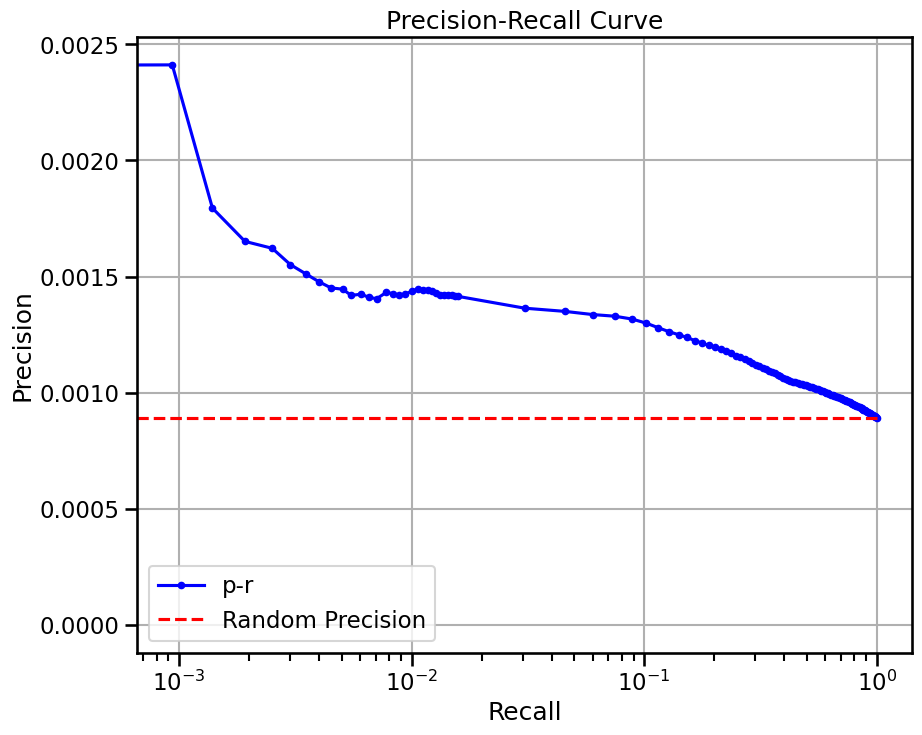


  0%|          | 0/64 [00:00<?, ?it/s]


  2%|▏         | 1/64 [00:01<01:52,  1.79s/it]


  3%|▎         | 2/64 [00:02<00:55,  1.11it/s]


  5%|▍         | 3/64 [00:02<00:37,  1.62it/s]


  6%|▋         | 4/64 [00:02<00:28,  2.07it/s]


  8%|▊         | 5/64 [00:02<00:24,  2.43it/s]


  9%|▉         | 6/64 [00:03<00:21,  2.72it/s]


 11%|█         | 7/64 [00:03<00:19,  2.93it/s]


 12%|█▎        | 8/64 [00:03<00:17,  3.11it/s]


 14%|█▍        | 9/64 [00:04<00:16,  3.26it/s]


 16%|█▌        | 10/64 [00:04<00:16,  3.36it/s]


 17%|█▋        | 11/64 [00:04<00:15,  3.45it/s]


 19%|█▉        | 12/64 [00:04<00:14,  3.50it/s]


 20%|██        | 13/64 [00:05<00:14,  3.52it/s]


 22%|██▏       | 14/64 [00:05<00:14,  3.56it/s]


 23%|██▎       | 15/64 [00:05<00:13,  3.56it/s]


 25%|██▌       | 16/64 [00:05<00:13,  3.59it/s]


 27%|██▋       | 17/64 [00:06<00:13,  3.60it/s]


 28%|██▊       | 18/64 [00:06<00:12,  3.61it/s]


 30%|██▉       | 19/64 [00:06<00:12,  3.61it/s]


 31%|███▏      | 20/64 [00:07<00:12,  3.61it/s]


 33%|███▎      | 21/64 [00:07<00:11,  3.60it/s]


 34%|███▍      | 22/64 [00:07<00:11,  3.61it/s]


 36%|███▌      | 23/64 [00:07<00:11,  3.61it/s]


 38%|███▊      | 24/64 [00:08<00:11,  3.59it/s]


 39%|███▉      | 25/64 [00:08<00:10,  3.62it/s]


 41%|████      | 26/64 [00:08<00:10,  3.62it/s]


 42%|████▏     | 27/64 [00:09<00:10,  3.62it/s]


 44%|████▍     | 28/64 [00:09<00:09,  3.63it/s]


 45%|████▌     | 29/64 [00:09<00:09,  3.62it/s]


 47%|████▋     | 30/64 [00:09<00:09,  3.62it/s]


 48%|████▊     | 31/64 [00:10<00:09,  3.60it/s]


 50%|█████     | 32/64 [00:10<00:08,  3.61it/s]


 52%|█████▏    | 33/64 [00:10<00:08,  3.62it/s]


 53%|█████▎    | 34/64 [00:10<00:08,  3.66it/s]


 55%|█████▍    | 35/64 [00:11<00:07,  3.67it/s]


 56%|█████▋    | 36/64 [00:11<00:07,  3.69it/s]


 58%|█████▊    | 37/64 [00:11<00:07,  3.71it/s]


 59%|█████▉    | 38/64 [00:12<00:07,  3.71it/s]


 61%|██████    | 39/64 [00:12<00:06,  3.72it/s]


 62%|██████▎   | 40/64 [00:12<00:06,  3.72it/s]


 64%|██████▍   | 41/64 [00:12<00:06,  3.72it/s]


 66%|██████▌   | 42/64 [00:13<00:05,  3.74it/s]


 67%|██████▋   | 43/64 [00:13<00:05,  3.75it/s]


 69%|██████▉   | 44/64 [00:13<00:05,  3.75it/s]


 70%|███████   | 45/64 [00:13<00:05,  3.77it/s]


 72%|███████▏  | 46/64 [00:14<00:04,  3.77it/s]


 73%|███████▎  | 47/64 [00:14<00:04,  3.75it/s]


 75%|███████▌  | 48/64 [00:14<00:04,  3.75it/s]


 77%|███████▋  | 49/64 [00:14<00:04,  3.75it/s]


 78%|███████▊  | 50/64 [00:15<00:03,  3.76it/s]


 80%|███████▉  | 51/64 [00:15<00:03,  3.76it/s]


 81%|████████▏ | 52/64 [00:15<00:03,  3.75it/s]


 83%|████████▎ | 53/64 [00:16<00:02,  3.74it/s]


 84%|████████▍ | 54/64 [00:16<00:02,  3.74it/s]


 86%|████████▌ | 55/64 [00:16<00:02,  3.74it/s]


 88%|████████▊ | 56/64 [00:16<00:02,  3.74it/s]


 89%|████████▉ | 57/64 [00:17<00:01,  3.76it/s]


 91%|█████████ | 58/64 [00:17<00:01,  3.76it/s]


 92%|█████████▏| 59/64 [00:17<00:01,  3.77it/s]


 94%|█████████▍| 60/64 [00:17<00:01,  3.77it/s]


 95%|█████████▌| 61/64 [00:18<00:00,  3.79it/s]


 97%|█████████▋| 62/64 [00:18<00:00,  3.79it/s]


 98%|█████████▊| 63/64 [00:18<00:00,  3.79it/s]


100%|██████████| 64/64 [00:18<00:00,  3.79it/s]


100%|██████████| 64/64 [00:19<00:00,  3.33it/s]

base enrichment


Top central genes: []


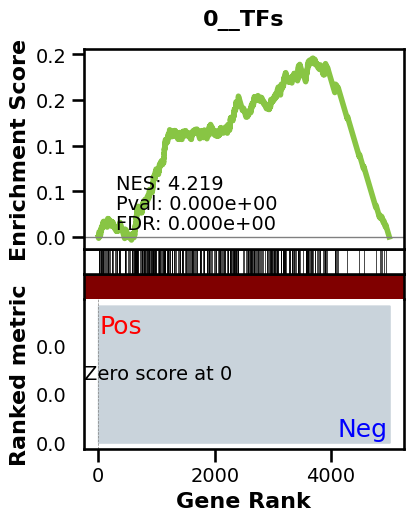

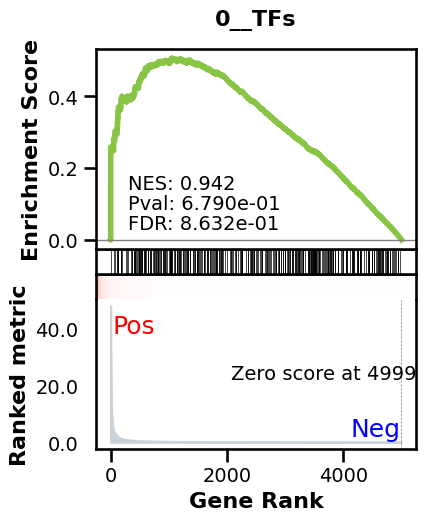

_________________________________________
TF specific enrichment


found some significant results for  27.272727272727273 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 97.59it/s]


 16%|█▌        | 20/128 [00:00<00:01, 96.88it/s]


 23%|██▎       | 30/128 [00:00<00:01, 96.62it/s]


 31%|███▏      | 40/128 [00:00<00:00, 96.48it/s]


 39%|███▉      | 50/128 [00:00<00:00, 96.59it/s]


 47%|████▋     | 60/128 [00:00<00:00, 96.67it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 96.83it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 96.92it/s]


 70%|███████   | 90/128 [00:00<00:00, 96.76it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 96.69it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 96.45it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 96.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 96.57it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012544235611960343
EPR: 0.7399357986125198


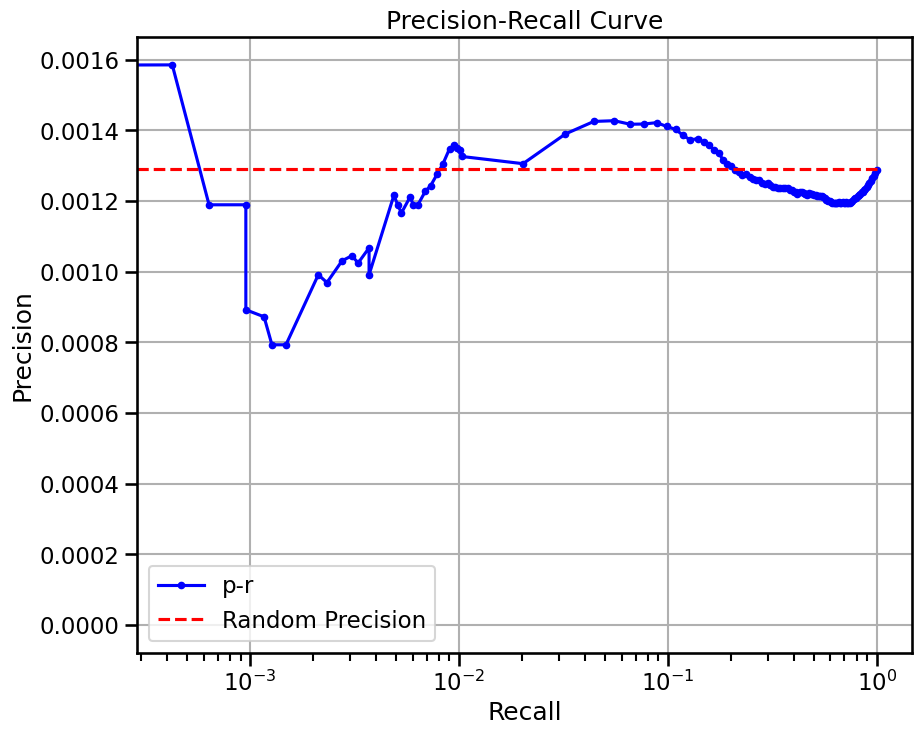

base enrichment


Top central genes: []


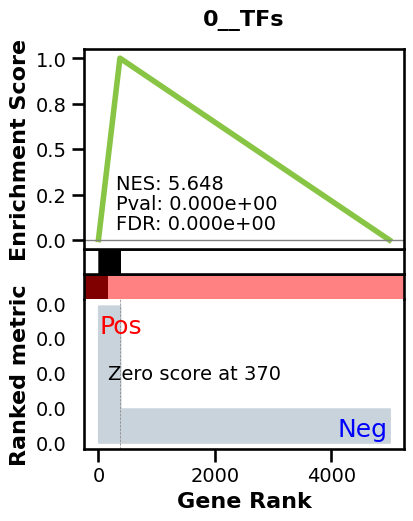

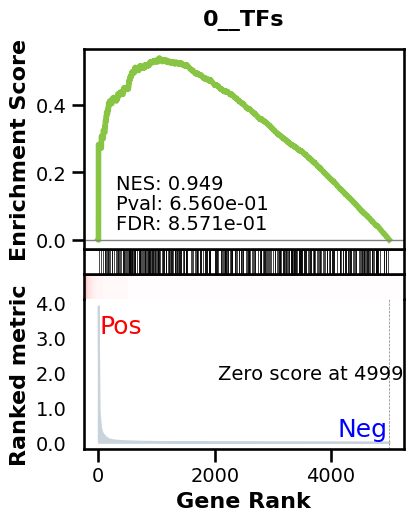

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.007002614850547766 
recall:  0.6589245943366211 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 96.17it/s]


 16%|█▌        | 20/128 [00:00<00:01, 96.58it/s]


 23%|██▎       | 30/128 [00:00<00:01, 95.90it/s]


 31%|███▏      | 40/128 [00:00<00:00, 95.86it/s]


 39%|███▉      | 50/128 [00:00<00:00, 95.71it/s]


 47%|████▋     | 60/128 [00:00<00:00, 95.85it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.68it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 95.77it/s]


 70%|███████   | 90/128 [00:01<00:00, 71.34it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 77.29it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 81.71it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 85.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 87.98it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0047095813353056045
EPR: 5.323791274494182


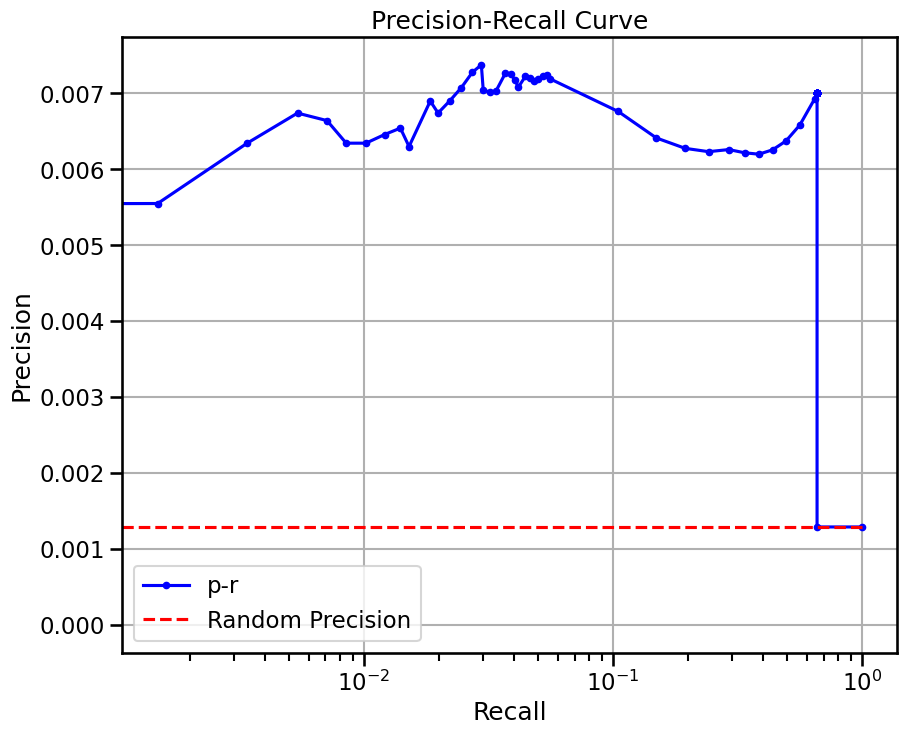

base enrichment


Top central genes: []


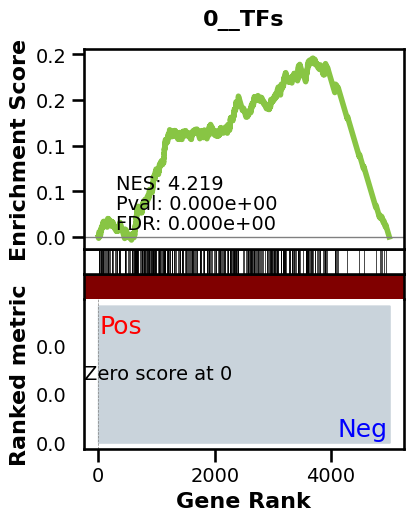

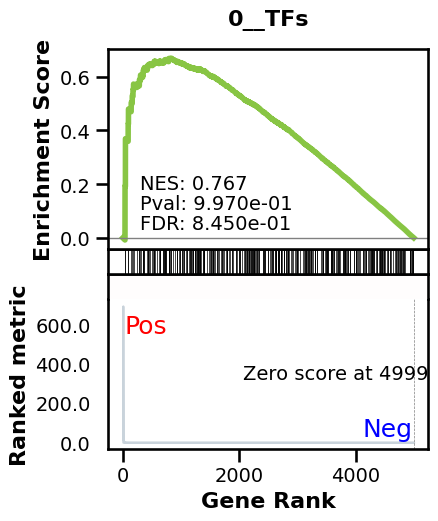

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 96.29it/s]


 16%|█▌        | 20/128 [00:00<00:01, 96.37it/s]


 23%|██▎       | 30/128 [00:00<00:01, 96.37it/s]


 31%|███▏      | 40/128 [00:00<00:00, 96.28it/s]


 39%|███▉      | 50/128 [00:00<00:00, 96.47it/s]


 47%|████▋     | 60/128 [00:00<00:00, 96.52it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.97it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 96.30it/s]


 70%|███████   | 90/128 [00:00<00:00, 96.11it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 96.39it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 95.91it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 96.33it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 96.18it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0019187707459266548
EPR: 1.5654106525154126


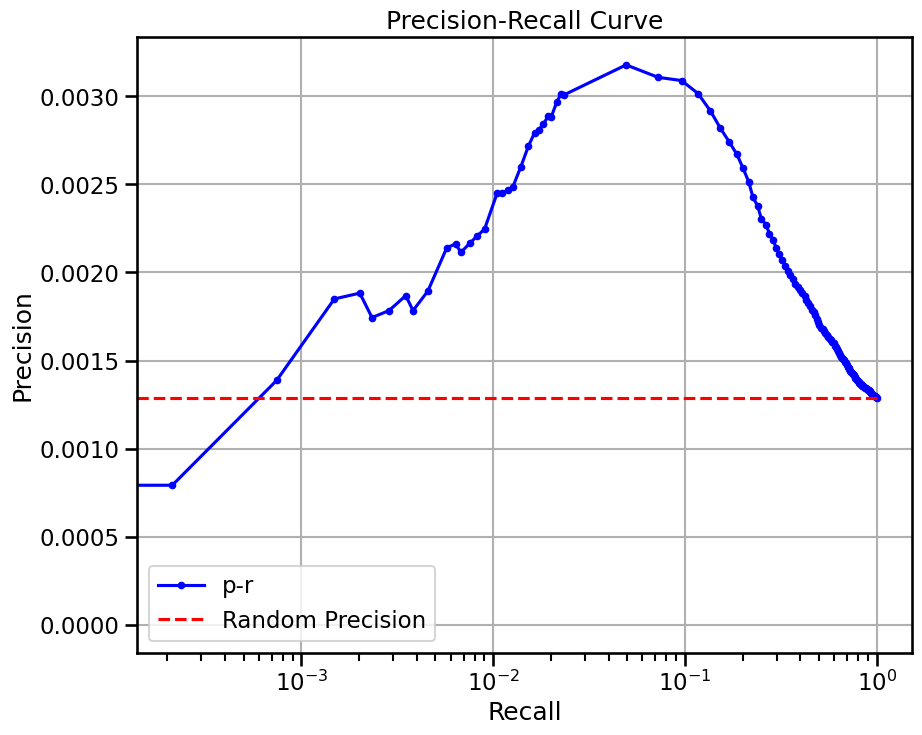

base enrichment


Top central genes: []


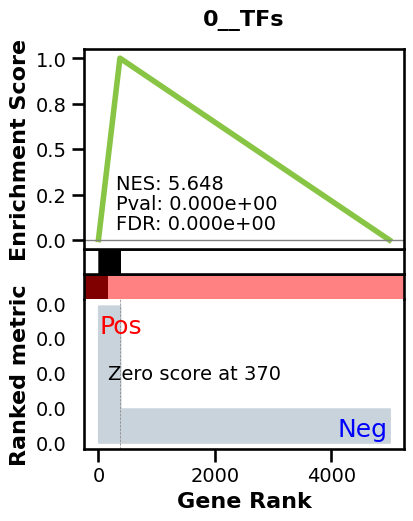

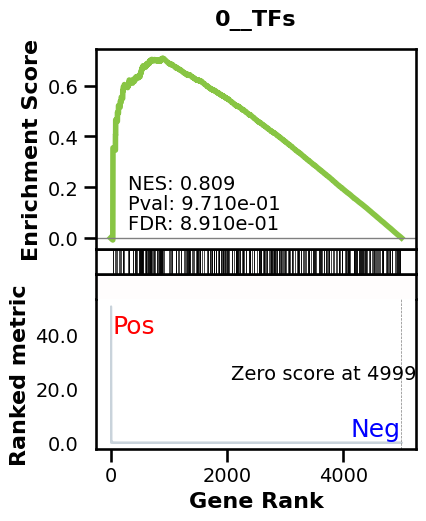

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.007002614850547766 
recall:  0.6589245943366211 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 94.63it/s]


 16%|█▌        | 20/128 [00:00<00:01, 94.34it/s]


 23%|██▎       | 30/128 [00:00<00:01, 94.90it/s]


 31%|███▏      | 40/128 [00:00<00:00, 95.48it/s]


 39%|███▉      | 50/128 [00:00<00:00, 95.47it/s]


 47%|████▋     | 60/128 [00:00<00:00, 95.38it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.61it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 95.45it/s]


 70%|███████   | 90/128 [00:00<00:00, 95.62it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 95.73it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 95.82it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 95.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 95.45it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0075836763933825
EPR: 14.202658963065698


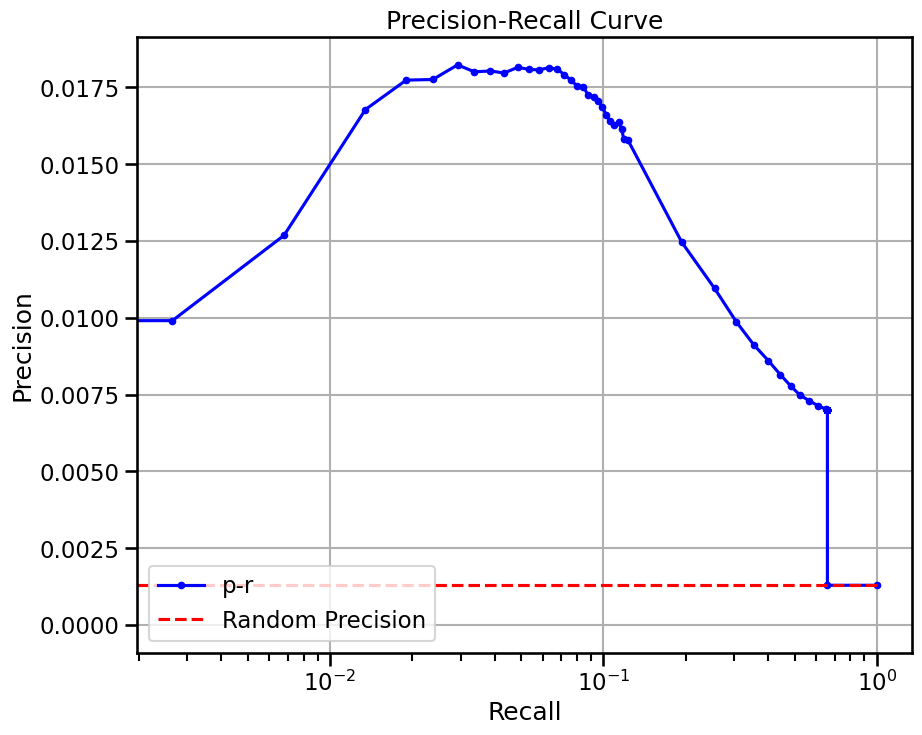

In [6]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="random expr",
                        preprocess="softmax",
                        head_agg='mean',
                        filtration="none",
                        forward_mode="none",
                        num_genes=2200,
                        max_cells=MAXCELLS,
                        doplot=False,
                        batch_size=32,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [7]:
metrics

{'kidney distal convoluted tubule epithelial cell_scprint_full': {'enriched_terms_Regulators': ['celltype.gmt__Cholangiocytes',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Distal tubule cells'],
  'significant_enriched_TFtargets': 70.53571428571429,
  'precision': 0.0008896322223674437,
  'recall': 1.0,
  'rand_precision': 0.0008897036558203398,
  'auprc': 0.0009514055469821365,
  'epr': 1.9825351225278036},
 'kidney distal convoluted tubule epithelial cell_scprint_mean': {'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Cholangiocytes',
   'celltype.gmt__Distal tubule cells',
   'celltype.gmt__Beta cells',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Gamma (PP) cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Delta cells'],
  'significant_enriched_TFtarg

In [ ]:
True
True
False
False

In [8]:
import pandas as pd

In [9]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

tools                                             name        EPR  \
0    full  kidney distal convoluted tubule epithelial cell   1.982535   
1    mean  kidney distal convoluted tubule epithelial cell   2.540537   
2    mean  kidney distal convoluted tubule epithelial cell   4.001868   
3   class  kidney distal convoluted tubule epithelial cell   3.026869   
4   class  kidney distal convoluted tubule epithelial cell  11.039794   
5    full            kidney collecting duct principal cell   2.236458   
6    mean            kidney collecting duct principal cell   0.611382   
7    mean            kidney collecting duct principal cell   4.059831   
8   class            kidney collecting duct principal cell   0.917781   
9   class            kidney collecting duct principal cell  11.299319   
10   full                                         podocyte   1.737021   
11   mean                                         podocyte   1.257830   
12   mean                                         podocyte   7.388170   
13  class                                         podocyte   0.932371   
14  class                                         podocyte  12.384809   
15   full                                       macrophage   1.905827   
16   mean                                       macrophage   0.569160   
17   mean                                       macrophage   5.681263   
18  class                                       macrophage   1.140077   
19  class                                       macrophage  17.577028   
20   full                   kidney interstitial fibroblast   2.753199   
21   mean                   kidney interstitial fibroblast   1.043395   
22   mean                   kidney interstitial fibroblast   7.269615   
23  class                   kidney interstitial fibroblast   3.201289   
24  class                   kidney interstitial fibroblast  36.655600   
25   full                                 endothelial cell   1.892488   
26   mean                                 endothelial cell   0.739936   
27   mean                                 endothelial cell   5.323791   
28  class                                 endothelial cell   1.565411   
29  class                                 endothelial cell  14.202659   

       AUPRC      RAND    TF_targ  TF_enr  TF_only  
0   0.000951  0.000890  70.535714   False    False  
1   0.000787  0.000826   8.823529    True    False  
2   0.001694  0.000826  11.764706    True     True  
3   0.001108  0.000826  17.647059    True    False  
4   0.003188  0.000826   8.823529    True     True  
5   0.000991  0.000890  71.428571   False    False  
6   0.001254  0.001259  12.500000    True    False  
7   0.003842  0.001259   3.125000    True     True  
8   0.001744  0.001259  26.562500    True    False  
9   0.006140  0.001259  14.062500    True     True  
10  0.001033  0.000890  72.321429   False    False  
11  0.001395  0.001415   8.333333    True    False  
12  0.004659  0.001415   2.083333    True     True  
13  0.002029  0.001415   2.083333    True    False  
14  0.007181  0.001415   2.083333    True     True  
15  0.001018  0.000909  71.428571   False    False  
16  0.001504  0.001351  23.809524    True    False  
17  0.004734  0.001351   2.380952    True     True  
18  0.002461  0.001351  26.190476    True    False  
19  0.009007  0.001351   4.761905    True     True  
20  0.001084  0.000890  68.750000   False    False  
21  0.001655  0.001382  20.370370   False    False  
22  0.004906  0.001382  11.111111    True     True  
23  0.003610  0.001382  12.962963   False    False  
24  0.012154  0.001382   5.555556    True     True  
25  0.001071  0.000890  72.321429   False    False  
26  0.001254  0.001289  27.272727    True    False  
27  0.004710  0.001289   0.000000    True     True  
28  0.001919  0.001289   9.090909    True    False  
29  0.007584  0.001289   9.090909    True     True